Vedant Singh Rathore
<br>Classification & Hypothesis Testing
<br>Course Assignment
<br>Full Code Submission

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Treatment
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, make_scorer
from sklearn import tree

# For tuning the model
from sklearn.model_selection import GridSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# You can uncomment the below code and run the Notebook if it is used in colab
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/IDSS/'

Mounted at /content/drive


In [ ]:
# Read the healthcare dataset file
data = pd.read_csv(path+"ExtraaLearn.csv")
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
### First 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
### Last 5 rows
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
#### Print Rows and Columns
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 4612
Columns: 15


In [ ]:
### Checking info of the data ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

1. No Null Values
2. All Data Types Correct
3. 1 ID column to be dropped before modelling as it doesn't provide any information. **Kept until modelling to keep count of classes**.
4. Target Column: status

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
## Filter Numeric Columns from the dataframe
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
## Drop target columns
numeric_columns.remove("status")

In [ ]:
### Summary of Categorical Columns
## df.describe method can be used to print the statistical summary of the data
## include='object' argument provides the summary for ordinal columns
df.describe(include='object').T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [ ]:
### Summary of Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Univariate Analysis**

In [ ]:
## Create a univariate analysis function that takes the dataframe, the column to be analyzed and a flag to check if the column is an id column
## This function can be used to analyze all the columns in the data without rewriting any piece of plotting code
def uni_analyze(df,col,id_col=False):
  print("-"*300)
  print(f'\nUnivariate Analysis of {col}\n')
  """Check if the given column is an id column"""
  if id_col==False:
    """If not an id column, check if the column is of 'object' dtype"""
    if df[col].dtype=='object':
      """Print the value counts for the column"""
      print(f'Unique Set of Values for {col}:\n{df[col].value_counts()}\n')
      plt.figure(figsize = (15,5))
      """If the number of unique entries in the column is less than 20, Plot the countplot"""
      """Too many unique values will lead to crowding of the plot"""
      if df[col].nunique()<20:
        fig = sns.countplot(data = df, x = col)
        for patch in fig.patches:
          label = patch.get_height()
          x = patch.get_x() + patch.get_width() / 2  # width of the plot
          y = patch.get_height()
          fig.annotate(label,(x,y))
      else:
        print('\nToo many distinct variables to be plotted on a countplot!!')
      plt.show()

    else:
      """If not an 'object' column, i.e. for numeric columns"""
      """Print the Mean, Median, Min, Max and Skew of the column"""
      print(f'Stats for the column {col}:\n Mean: {df[col].mean()}\n Min: {df[col].min()}\n Max: {df[col].max()}\n Median: {df[col].median()}\n Skew: {df[col].skew()}\n')

      f, (hist_plot, box_plot) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.75, 0.25)},
        figsize=(15,5)
      )
      """Subplot Histogram of the column"""
      sns.histplot(data=df,x=col, ax=hist_plot, kde=False) ## Histogram
      """Plot the boxplot of the column"""
      sns.boxplot(data=df,x=col, ax=box_plot) ## Boxplot
      """Add Mean to histogram"""
      hist_plot.axvline(df[col].mean())
      """Add Median to histplot"""
      hist_plot.axvline(df[col].mean())
      f.suptitle(f'Boxplot & Histogram for {col}')
      plt.show()

  else:
    """If an ID column, show the total number of unique counts in the column and print sample data"""
    print(f'Unique Values for {col}:\n{df[col].nunique()}')
    print(f'\n Sample data\n')
    print(df[col].head())

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of ID

Unique Set of Values for ID:
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64


Too many distinct variables to be plotted on a countplot!!


<Figure size 1500x500 with 0 Axes>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of age

Stats for the column age:
 Mean: 46.20121422376409
 Min: 18
 Max: 63
 Median: 51.0
 Skew: -0.7200216909419968



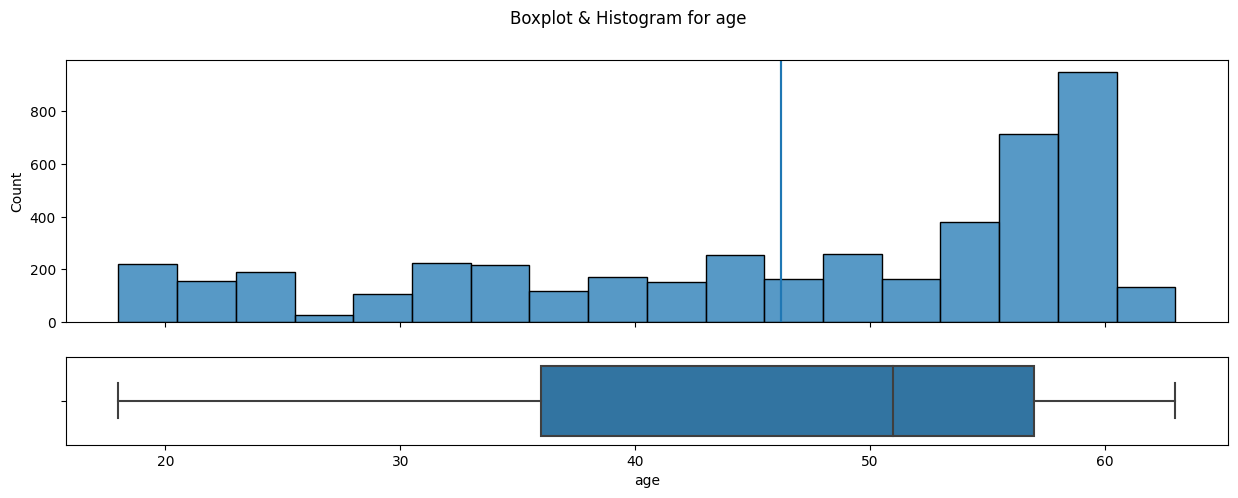

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of current_occupation

Unique Set of Values for current_occupation:
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64



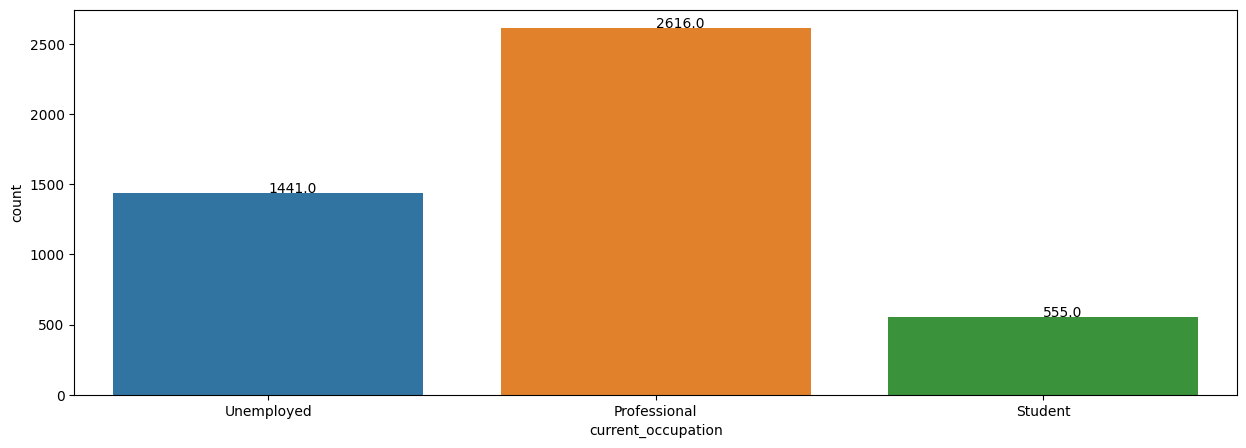

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of first_interaction

Unique Set of Values for first_interaction:
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64



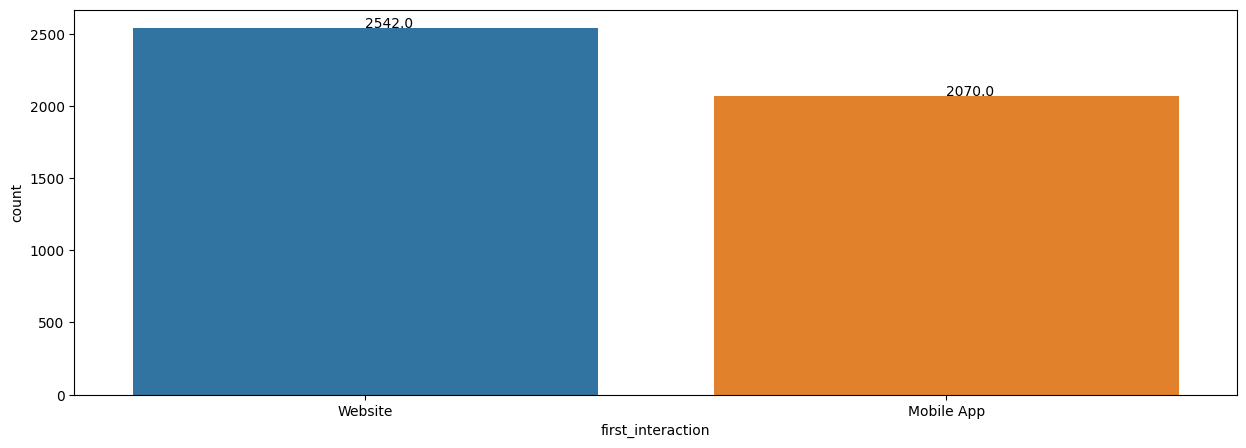

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of profile_completed

Unique Set of Values for profile_completed:
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64



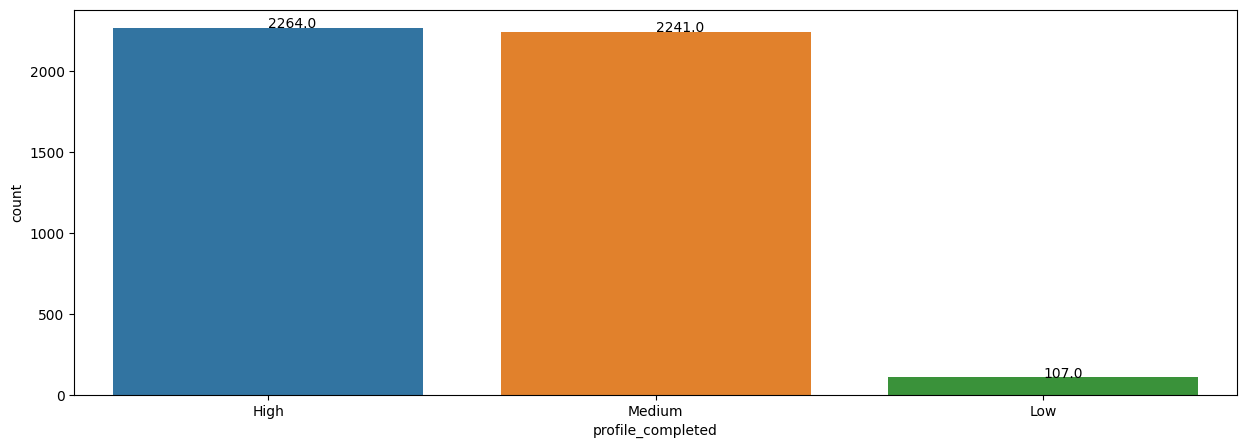

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of website_visits

Stats for the column website_visits:
 Mean: 3.566782307025152
 Min: 0
 Max: 30
 Median: 3.0
 Skew: 2.156165213085116



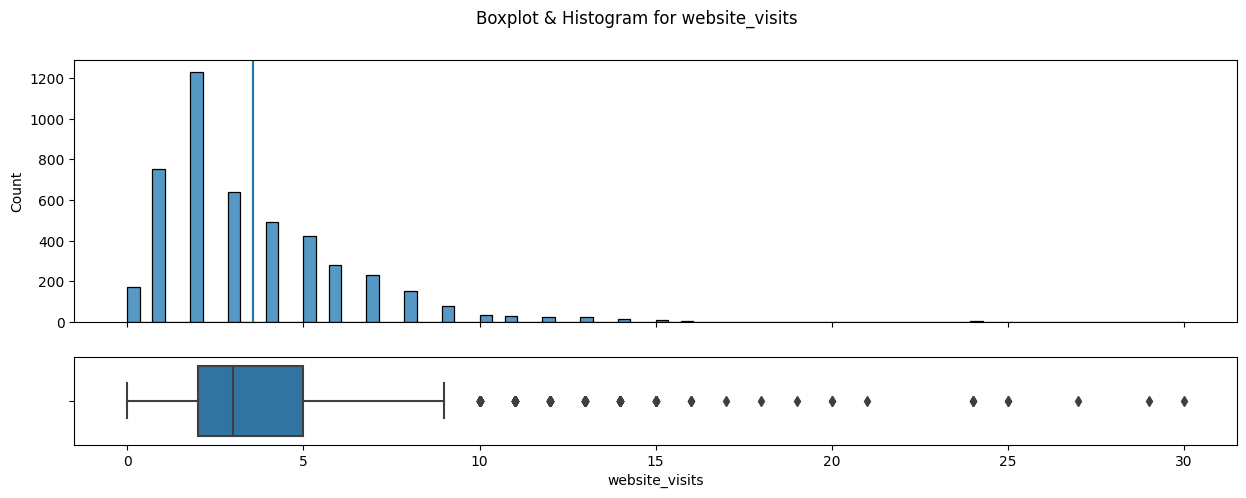

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of time_spent_on_website

Stats for the column time_spent_on_website:
 Mean: 724.0112749349523
 Min: 0
 Max: 2537
 Median: 376.0
 Skew: 0.9529283019036358



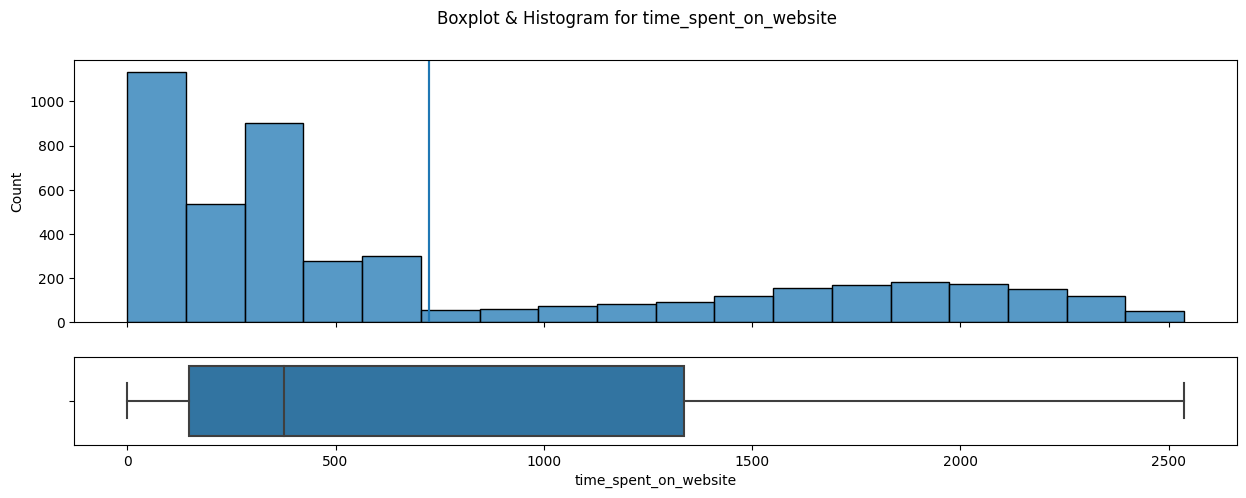

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of page_views_per_visit

Stats for the column page_views_per_visit:
 Mean: 3.0261255420641806
 Min: 0.0
 Max: 18.434
 Median: 2.792
 Skew: 1.2650041233027869



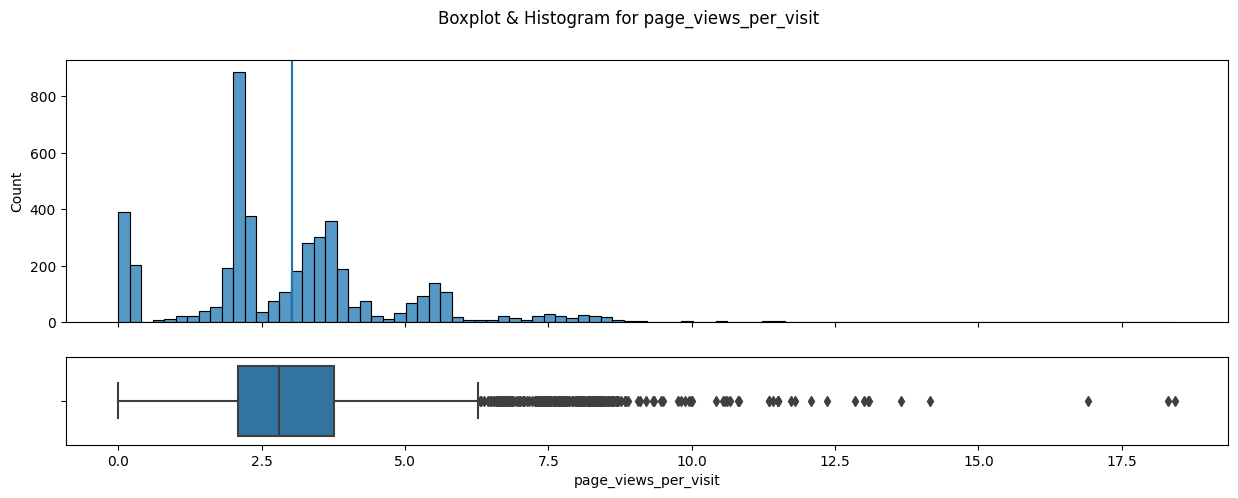

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of last_activity

Unique Set of Values for last_activity:
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64



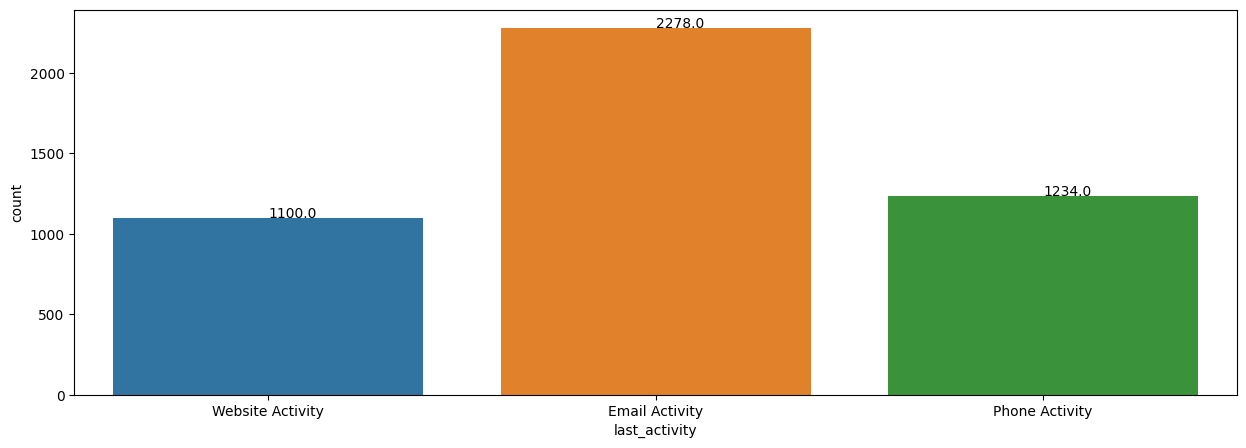

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of print_media_type1

Unique Set of Values for print_media_type1:
No     4115
Yes     497
Name: print_media_type1, dtype: int64



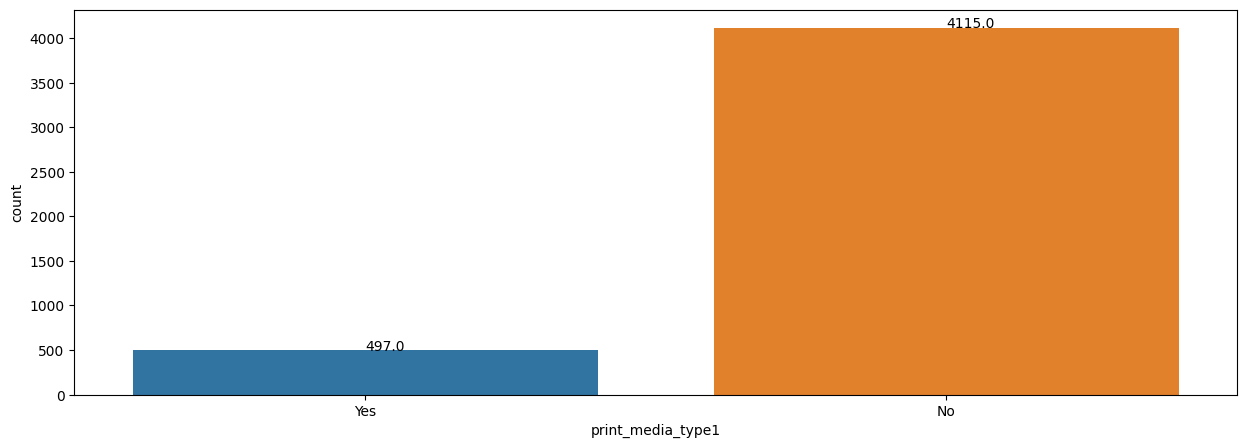

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of print_media_type2

Unique Set of Values for print_media_type2:
No     4379
Yes     233
Name: print_media_type2, dtype: int64



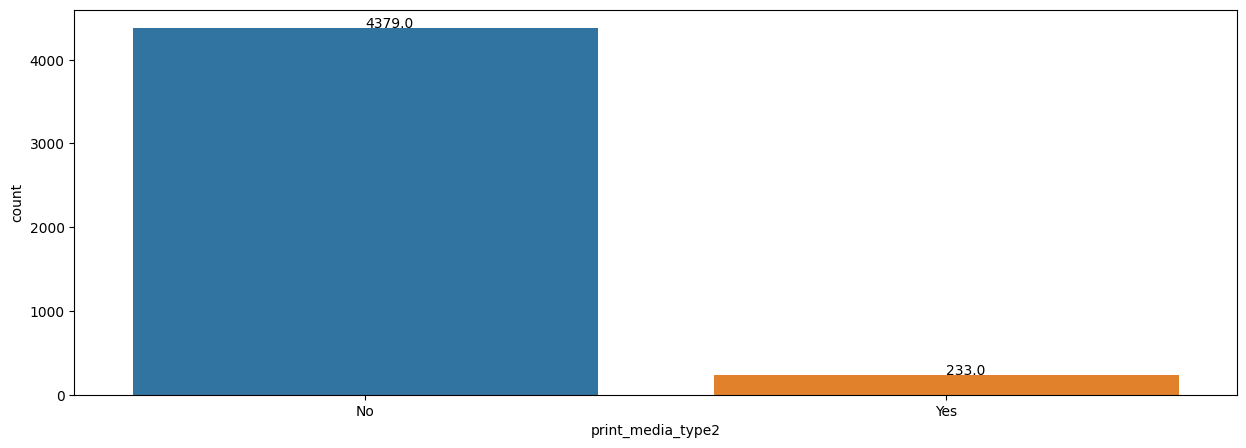

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of digital_media

Unique Set of Values for digital_media:
No     4085
Yes     527
Name: digital_media, dtype: int64



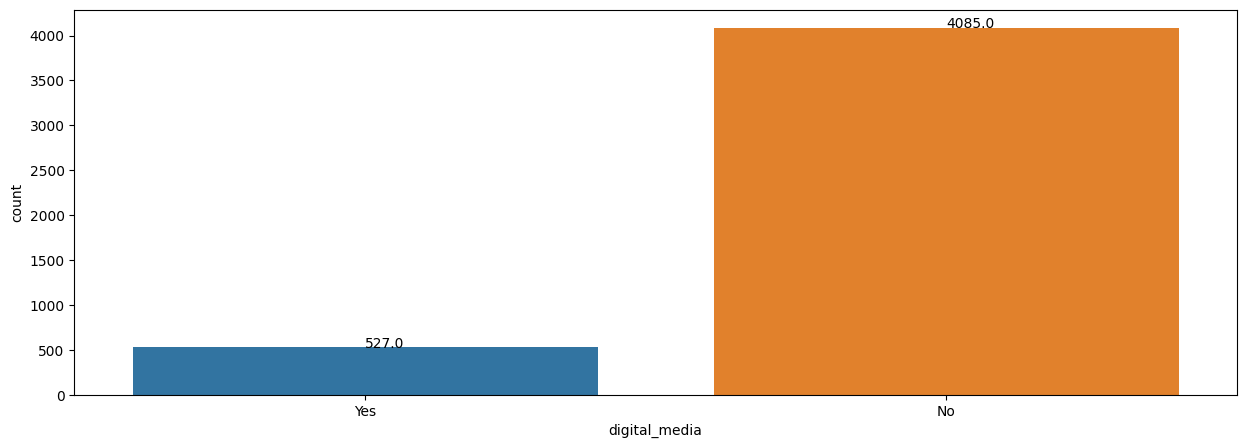

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of educational_channels

Unique Set of Values for educational_channels:
No     3907
Yes     705
Name: educational_channels, dtype: int64



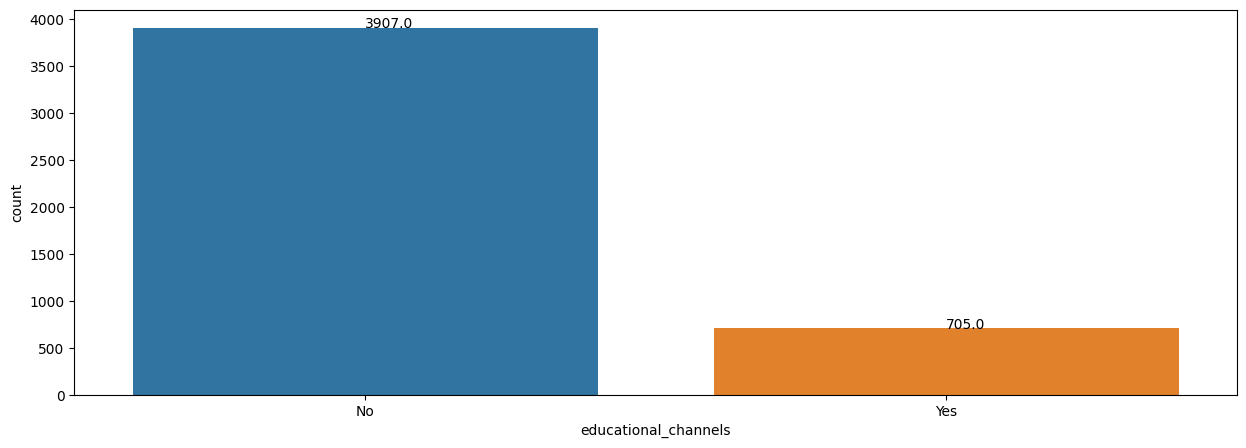

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of referral

Unique Set of Values for referral:
No     4519
Yes      93
Name: referral, dtype: int64



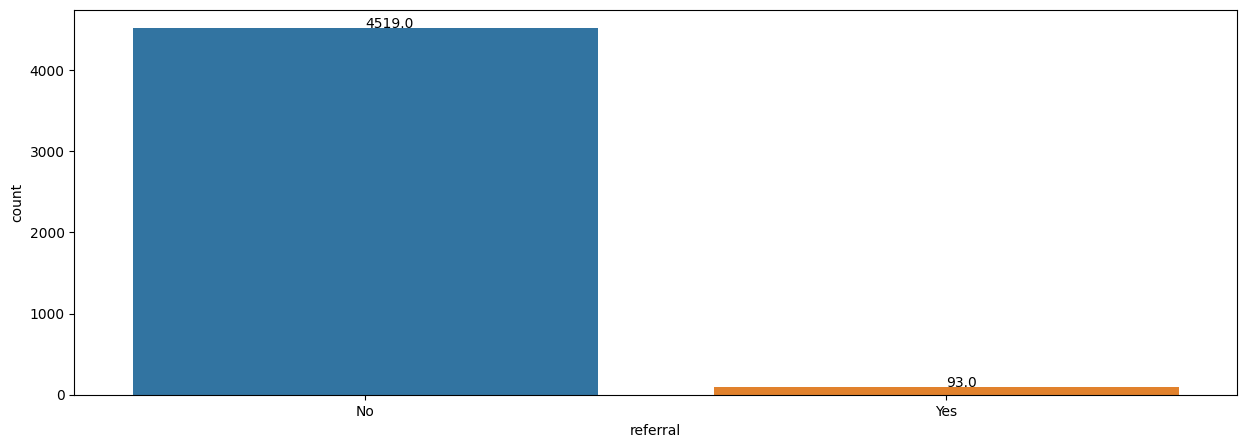

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of status

Stats for the column status:
 Mean: 0.29856895056374677
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 0.8806085180934274



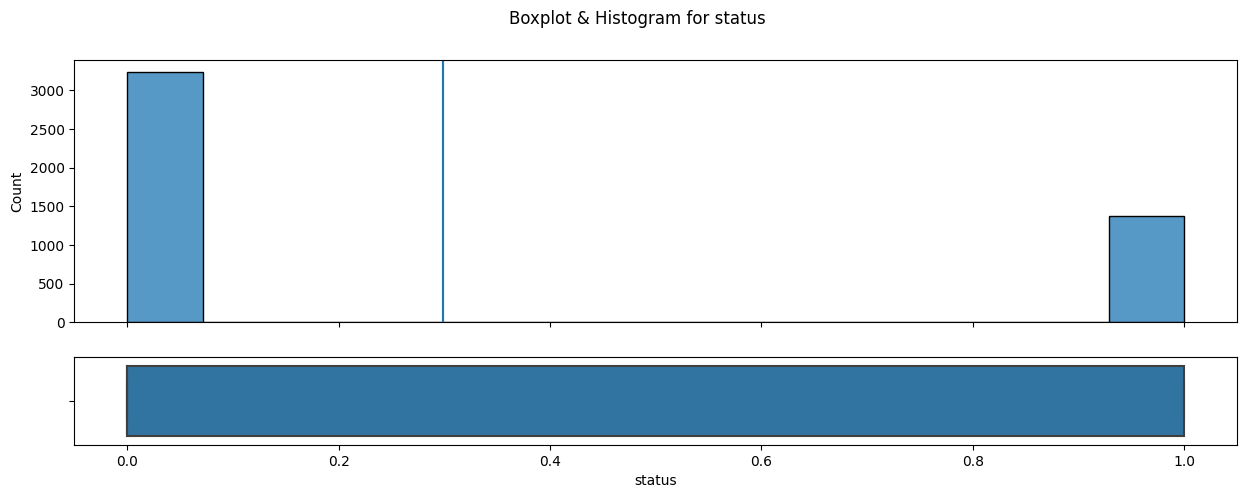

In [ ]:
## To Analyze All Columns in a single output block
## Creating an analyze function helps iterate over the df.columns list and print all outputs in one output block
for column in df.columns:
  uni_analyze(df,column)

Univariate Analysis Observations:
1. Larger population is comprised of working professionals. The media targeting can be adjusted to drive conversions from these professionals.
2. Most users interact first with the website. The website can be made more user interactive to retain customers and increase conversion likelihood.
3. There are very low number of people who have low profile completion. Medium and High completion has similar number of people.
4. Website visits are almost normally distributed with a right skew. There are few users above the 75th percentile that are the "outliers"
5. Time spent on website also has a skew. Large number of people are clustered from 0-600 with some sparsely spread over 600 to 2500.
6. Largest last_activity is Email. The company is targeting a lot of the potential customer base with Emails.
7. The media target base is very small compared to overall population for Newspaper, Magazine and Digital media.
8. Referrals are only 2% of the total population size.
9. Overall age median is around 52 meaning that the working professionals in mid-senior and senior level are interacting most with the platform.

**Multivariate Analysis**

In [ ]:
## Barplots and distplots are some of the best plots for multivariate analysis
### Distribution Plot
def distribution_plot(data, predictor, target):

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

    target_uniq = data[target].unique()

    axs[0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0],
        color="teal",
        stat="density",
    )

    axs[1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[1],
        color="orange",
        stat="density",
    )

    plt.show()
### Bar Plot
def bar_plot(df,feature, target):
    plt.figure(figsize=(15,7))
    ## Get feature wise percentage split of converting and non-converting
    plot_df = pd.crosstab(df[feature], df[target]).sort_values(by=df[target].value_counts().index[-1], ascending=False)
    plot_df.plot(kind="bar", stacked=True)
    plt.xticks(rotation = 60)
    plt.show()

## Create a dataframe to observe the conversion rate basis given column
def check_conversion_split(df,col,target):
  temp_df = df.groupby([col,target]).agg({'ID':'count'}).reset_index()
  temp_df = temp_df.pivot(index=col, columns=target, values='ID').reset_index()
  temp_df['conversion_rate'] = temp_df[1]*100/(temp_df[0]+temp_df[1])
  return temp_df

## This functions take the dataframe and the feature & target columns as input and outputs the stacked barplot and distribution plots
## Rather than rewriting the code for each pair of variables, this function can be reused with different col_list to get desired output
def multi_analyze(df,feature, target):
  bar_plot(df,feature, target)
  print("-"*300)
  distribution_plot(data=df,predictor=feature,target=target)
  check_conversion_split(df,feature,target)

**Correlation Matrix**

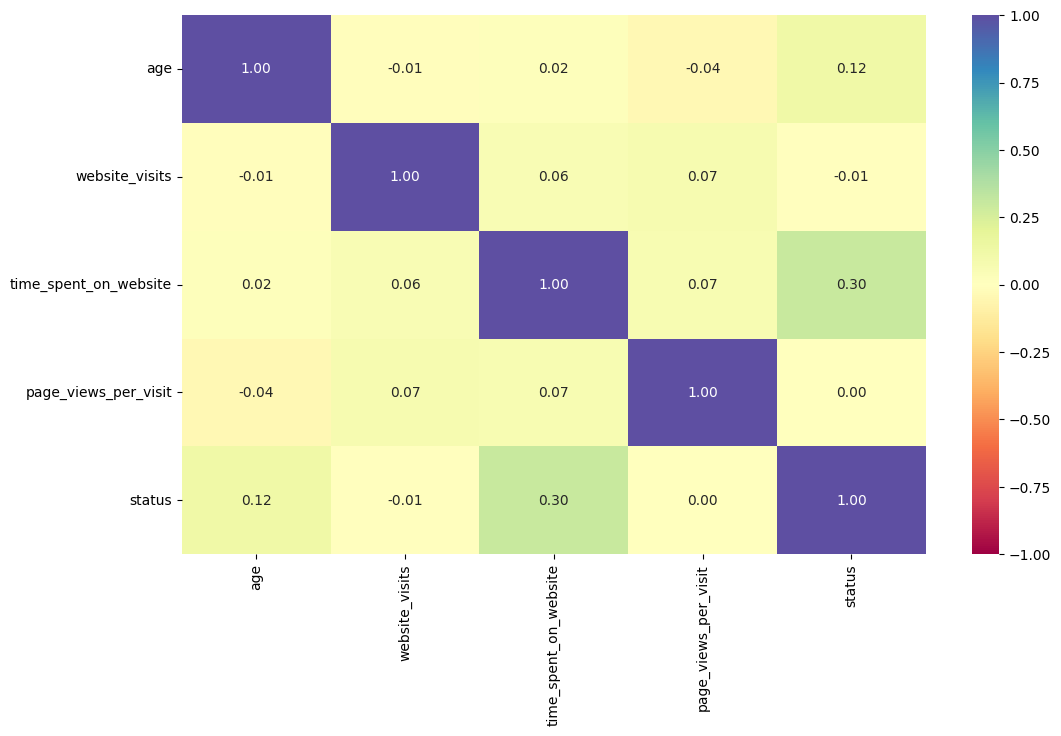

In [ ]:
## Plot Correlation Matrix
corr_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[corr_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Slight correlation observed between time_spent_on_website and status. Since one is a binary variable and other continuos, the relation in isolation can not establish much.

### Q1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

<Figure size 1500x700 with 0 Axes>

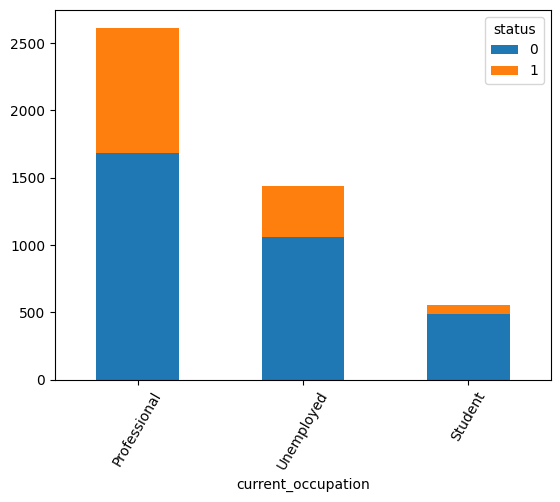

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


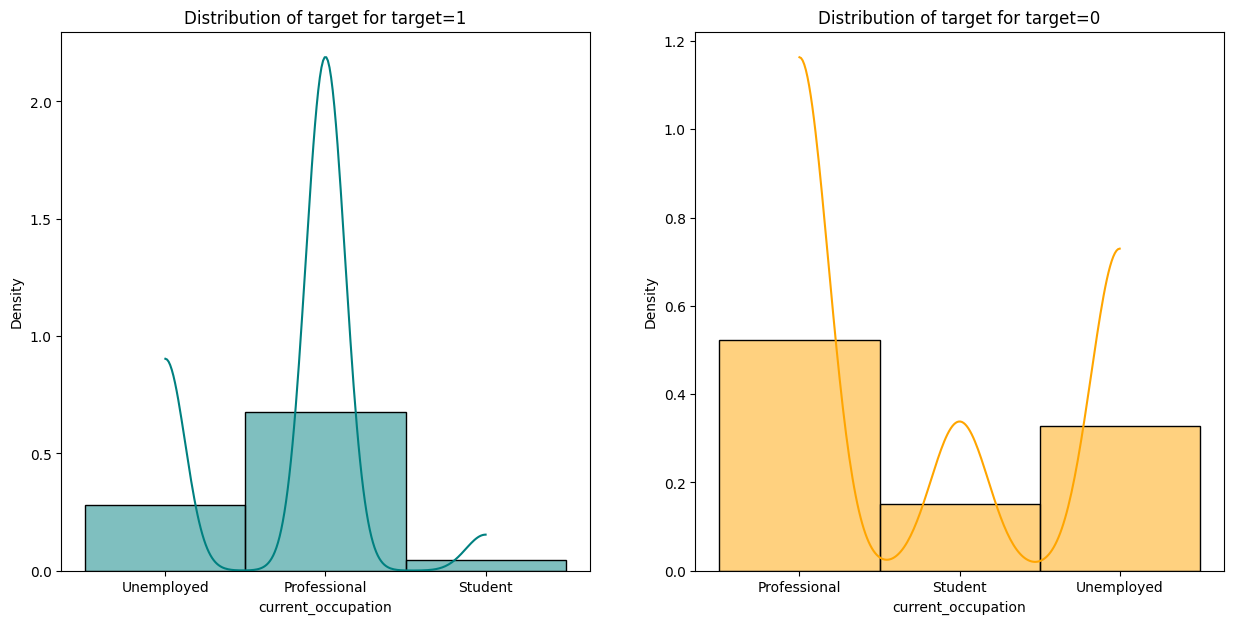

In [ ]:
multi_analyze(df, "current_occupation", "status")

In [ ]:
check_conversion_split(df, 'current_occupation', 'status')

status,current_occupation,0,1,conversion_rate
0,Professional,1687,929,35.512232
1,Student,490,65,11.711712
2,Unemployed,1058,383,26.578765


Let's split the occupation comparison by other features to see if any further detail can be captured

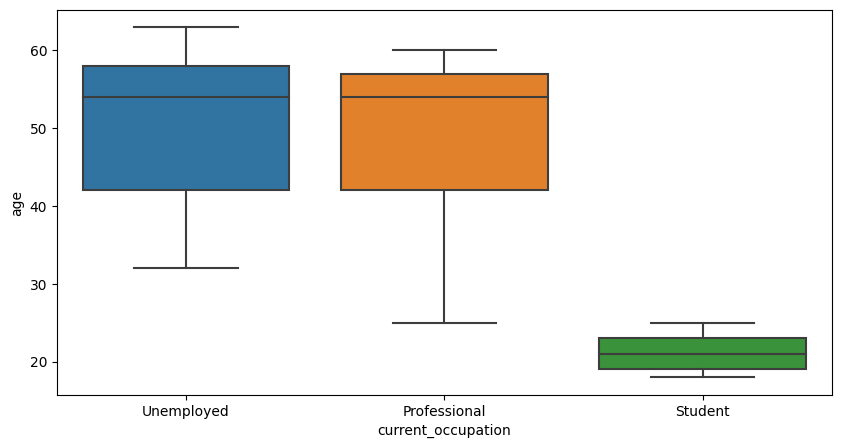

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["current_occupation"], y=df["age"])
plt.show()

Most of the Students are young (<25)
50% professionals are below ~54. This group has a higher likelihood of converting.

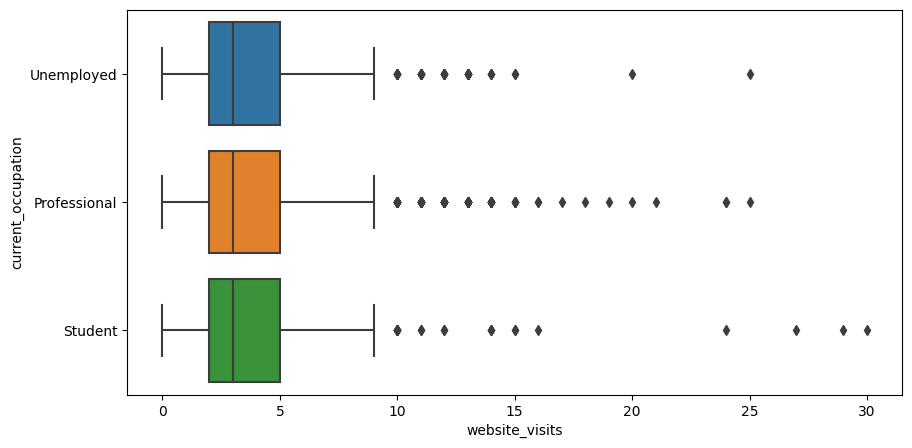

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df["current_occupation"], x=df["website_visits"])
plt.show()

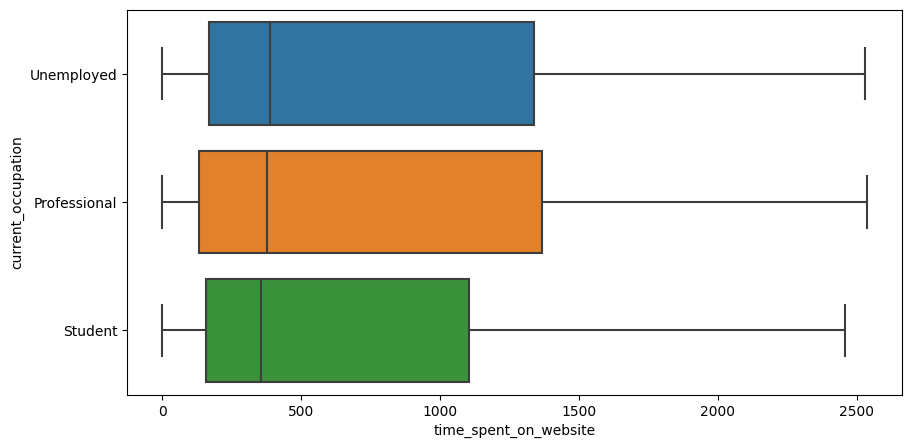

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df["current_occupation"], x=df["time_spent_on_website"])
plt.show()

### Q2: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

<Figure size 1500x700 with 0 Axes>

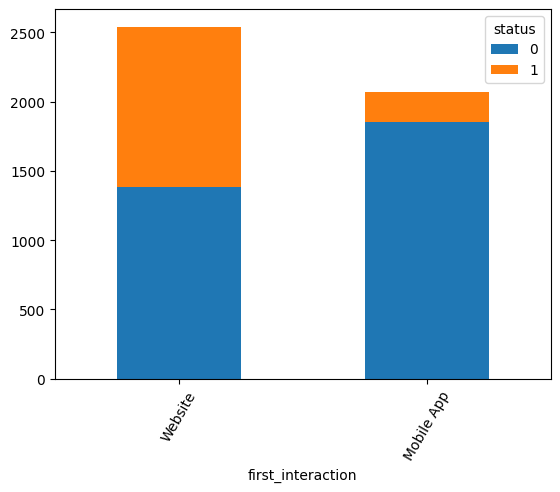

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


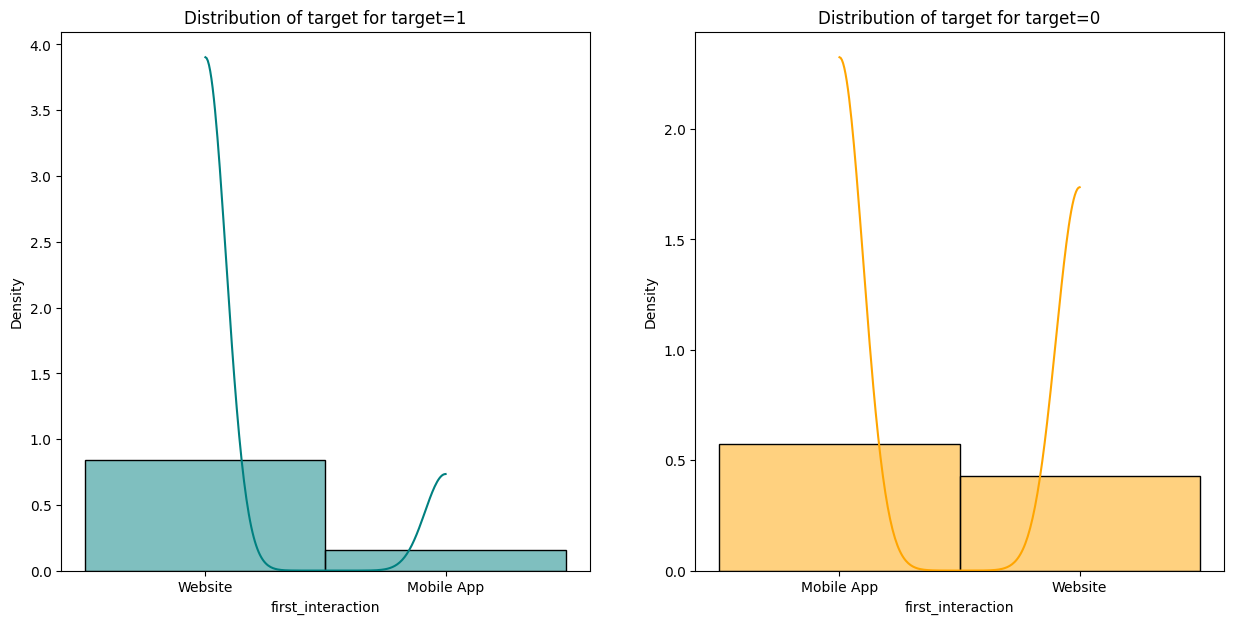

In [ ]:
multi_analyze(df, "first_interaction", "status")

In [ ]:
check_conversion_split(df, 'first_interaction', 'status')

status,first_interaction,0,1,conversion_rate
0,Mobile App,1852,218,10.531401
1,Website,1383,1159,45.594020


### Q3: The company uses multiple modes to interact with prospects. Which way of interaction works best?

<Figure size 1500x700 with 0 Axes>

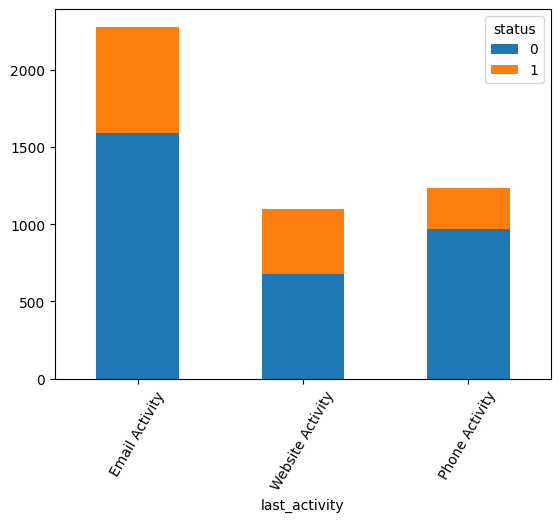

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


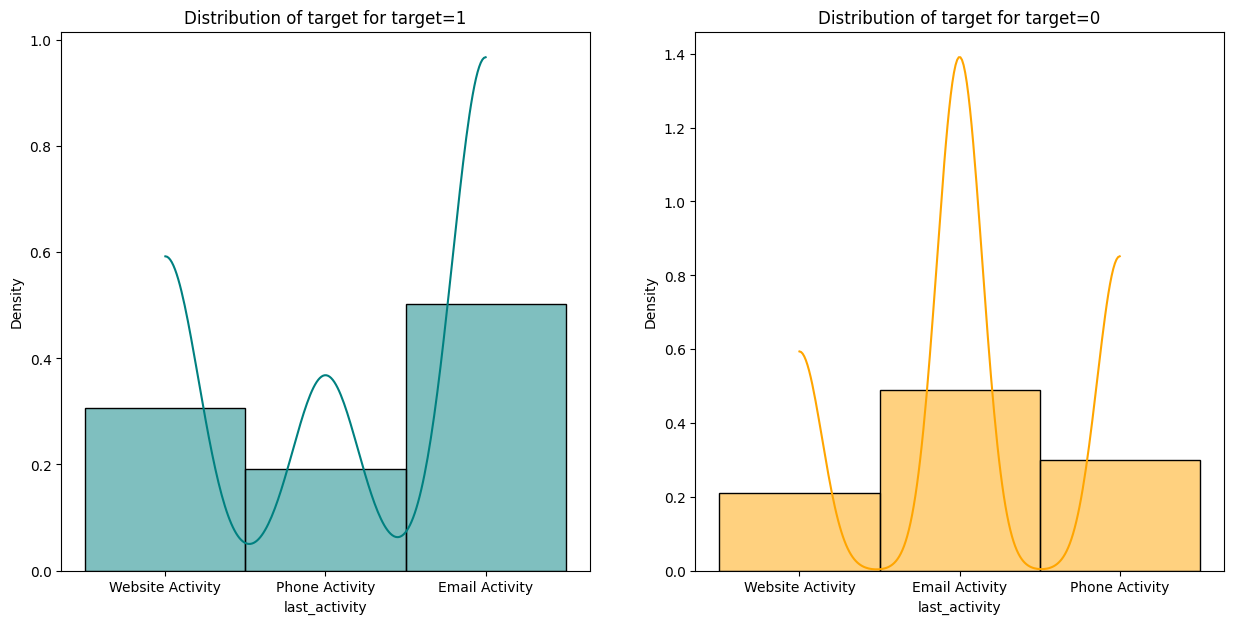

In [ ]:
multi_analyze(df, "last_activity", "status")

In [ ]:
check_conversion_split(df, 'last_activity', 'status')

status,last_activity,0,1,conversion_rate
0,Email Activity,1587,691,30.333626
1,Phone Activity,971,263,21.312804
2,Website Activity,677,423,38.454545


### Q4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

In [ ]:
check_conversion_split(df, 'print_media_type1', 'status')

status,print_media_type1,0,1,conversion_rate
0,No,2897,1218,29.599028
1,Yes,338,159,31.991952


In [ ]:
check_conversion_split(df, 'print_media_type2', 'status')

status,print_media_type2,0,1,conversion_rate
0,No,3077,1302,29.732816
1,Yes,158,75,32.188841


In [ ]:
check_conversion_split(df, 'digital_media', 'status')

status,digital_media,0,1,conversion_rate
0,No,2876,1209,29.596083
1,Yes,359,168,31.878558


In [ ]:
check_conversion_split(df, 'referral', 'status')

status,referral,0,1,conversion_rate
0,No,3205,1314,29.077229
1,Yes,30,63,67.741935


In [ ]:
check_conversion_split(df, 'educational_channels', 'status')

status,educational_channels,0,1,conversion_rate
0,No,2727,1180,30.202201
1,Yes,508,197,27.943262


### Q5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

<Figure size 1500x700 with 0 Axes>

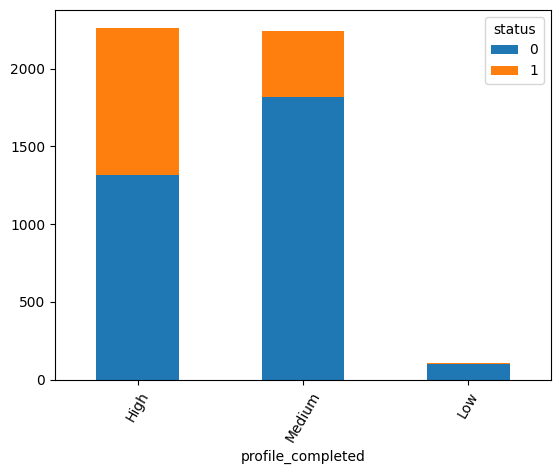

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


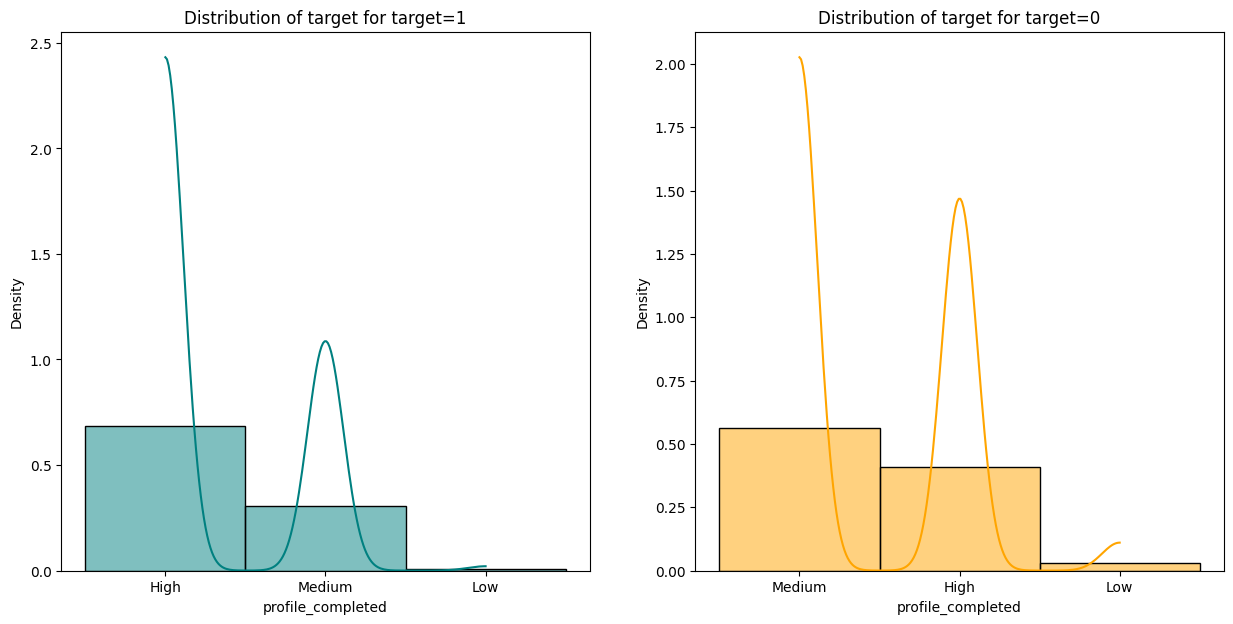

In [ ]:
multi_analyze(df, "profile_completed", "status")

In [ ]:
check_conversion_split(df,'profile_completed','status')

status,profile_completed,0,1,conversion_rate
0,High,1318,946,41.784452
1,Low,99,8,7.476636
2,Medium,1818,423,18.875502


**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Answers**
1. Professionals have a higher percentage of conversions on their base while students have the least. The current occupation plays an important role intuitively in determining likelihood of conversion. Median of these professionals is around 52. These could be people trying to upskill and stay relevant in their current profession.
2. People interacting with the website as the first touchpoint have higher chance of converting as shown in the barplot and the conversion% table. The first interaction medium definitely works well. There can be another study done into why mobile app as a medium is not working well.
3. The company interacts with the prospects through website, email and the mobile app. Website activity has the highest conversion rate followed closely by email activity which means that customers are converting most likely after last interacting with the website. We can also see in univariate analysis that the company primarily targets the customers through Email medium as it has the highest count.
4. Of the 5 channels (Newspaper, Magazine, Digital, Referral, Education), Referrals have the highest conversion rate, however it would be important to note that only a total of 93 users have interacted with this medium. In conventional Newspaper, Magazine and Digital, Magazine has a slightly better conversion rate but not enough to make it significantly better than other channels.
5. It's clearly visibile that while high profile completion and medium profile completion has similar number of total prospects, high profile completion has a much higher conversion rate (42% against 19%). Therefore, having more details about the prospects is clearly increasing the chances of conversion.

## Data Preprocessing

- Missing value treatment (if needed): **No missing value**
- Feature engineering (if needed): **Carried out below**
- Outlier detection and treatment (if needed): **Carried out below**
- Preparing data for modeling: **Carried out below**

### Treatment and Transformations

**Outlier Treatment**

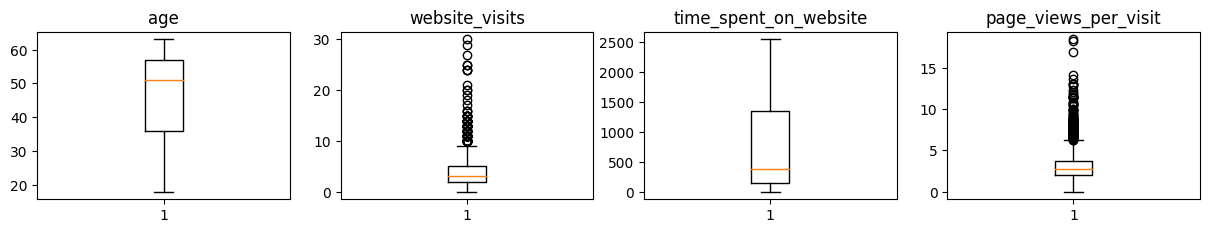

In [ ]:
### Check for outliers
plt.figure(figsize=(15, 10))
for col, col_name in enumerate(numeric_columns):
    plt.subplot(4, 4, col + 1)
    plt.boxplot(df[col_name], whis=1.5)
    plt.title(col_name)

plt.show()

Clearly website_visits and page_views_per_visit have outliers.
As a practice, we can cap all the numerical columns between the 5th and 95th percentile values to prevent model being affected by outliers.

In [ ]:
### Cap extreme values at 5th and 95th percentile

def cap_column_values(df, column_name):
    # Calculate the 5th and 95th percentiles
    lower_bound = df[column_name].quantile(0.05)
    upper_bound = df[column_name].quantile(0.95)

    # Cap the column values between the percentiles
    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in numeric_columns:
  df = cap_column_values(df,col)

**Creating dummy variables for categorical Variables**

In [ ]:
# Mapping Yes to 1 and No to 0 for Categorical Columns
dict_cat_enc = {'Yes': 1, 'No':0}
categorical_columns.remove('ID')
df[categorical_columns]=df[categorical_columns].replace(dict_cat_enc)

# Creating dummy variables
df = pd.get_dummies(data = df, columns = categorical_columns, drop_first = True)

**Removing Skewness**

In [ ]:
## Check Skewness in the data
for col in numeric_columns:
  print(col, df[col].skew())

age -0.6995938245333805
website_visits 0.9149389503848971
time_spent_on_website 0.9176524966495664
page_views_per_visit 0.3586226944109497


In [ ]:
def remove_skewness(df, column_name):
    # Apply transformation to the specified column
    if df[column_name].skew()>=0:
      df[column_name] = np.sqrt(df[column_name])
    else:
      transformed_data, _ = boxcox(df[column_name])
      df[column_name] = transformed_data

    return df


for col in numeric_columns:
  df = remove_skewness(df,col)

**Define X, Y, Test and Train**

In [ ]:
X = df.drop(["status","ID"], axis=1)
Y = df.status

## Enable Stratified Sampling while performing split using stratify argument
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)

**Scaling the data**

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.701363
1    0.298637
Name: status, dtype: float64
Percentage of classes in test set:
0    0.70159
1    0.29841
Name: status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of ID

Unique Set of Values for ID:
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64


Too many distinct variables to be plotted on a countplot!!


<Figure size 1500x500 with 0 Axes>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of age

Stats for the column age:
 Mean: 2159.4448961712196
 Min: 350.87899763529106
 Max: 3469.813890466646
 Median: 2433.9154966807932
 Skew: -0.38624762357101833



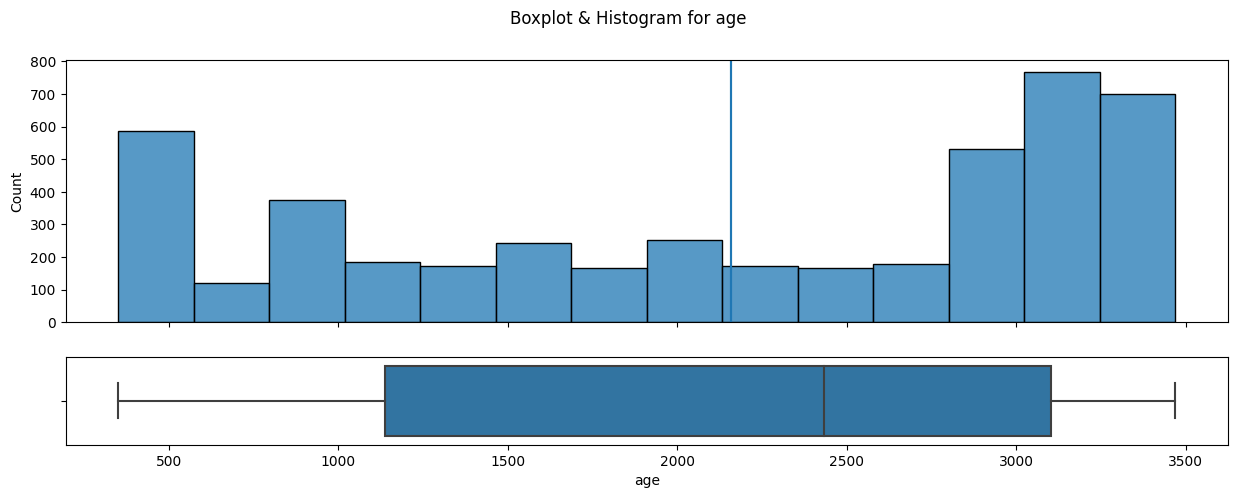

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of website_visits

Stats for the column website_visits:
 Mean: 1.7642230333438014
 Min: 1.0
 Max: 3.0
 Median: 1.7320508075688772
 Skew: 0.4577485352836104



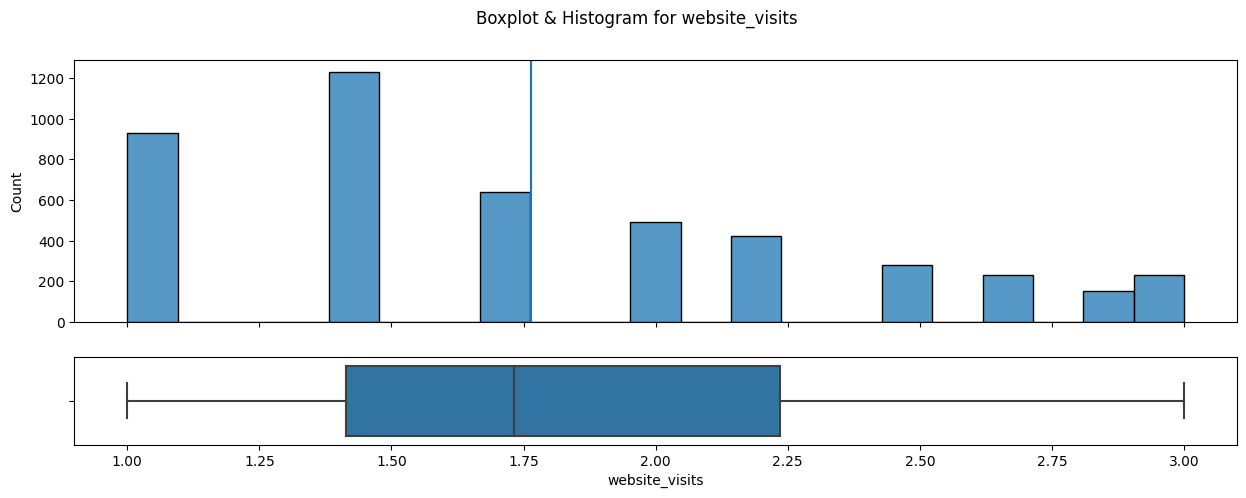

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of time_spent_on_website

Stats for the column time_spent_on_website:
 Mean: 22.880365297001447
 Min: 1.0
 Max: 47.00478699026302
 Median: 19.390719429665317
 Skew: 0.3669244061250299



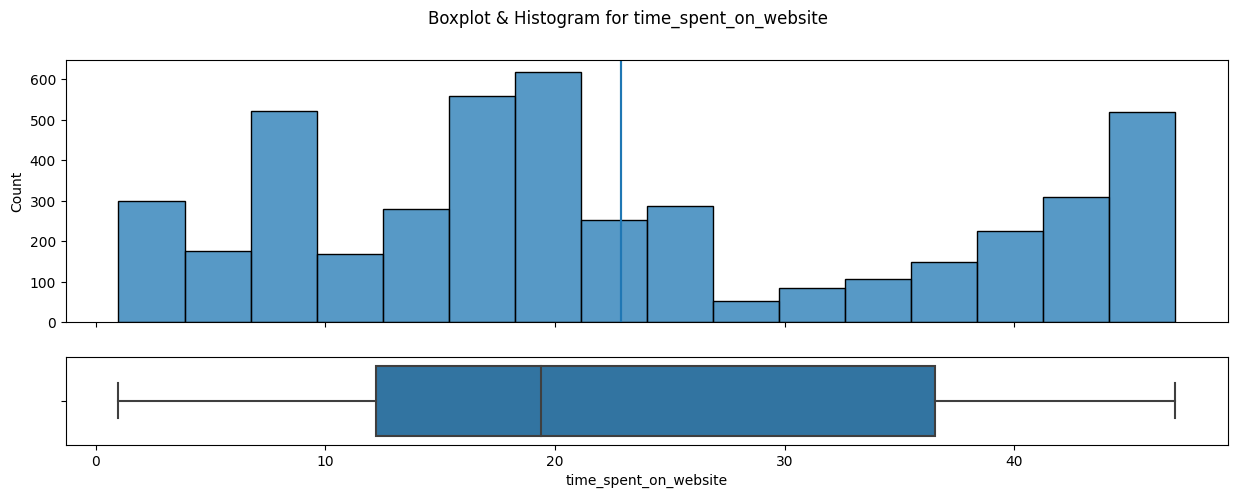

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of page_views_per_visit

Stats for the column page_views_per_visit:
 Mean: 1.6130037397932349
 Min: 0.28731515797117285
 Max: 2.6009613607279904
 Median: 1.6709278859364338
 Skew: -0.7133589622649128



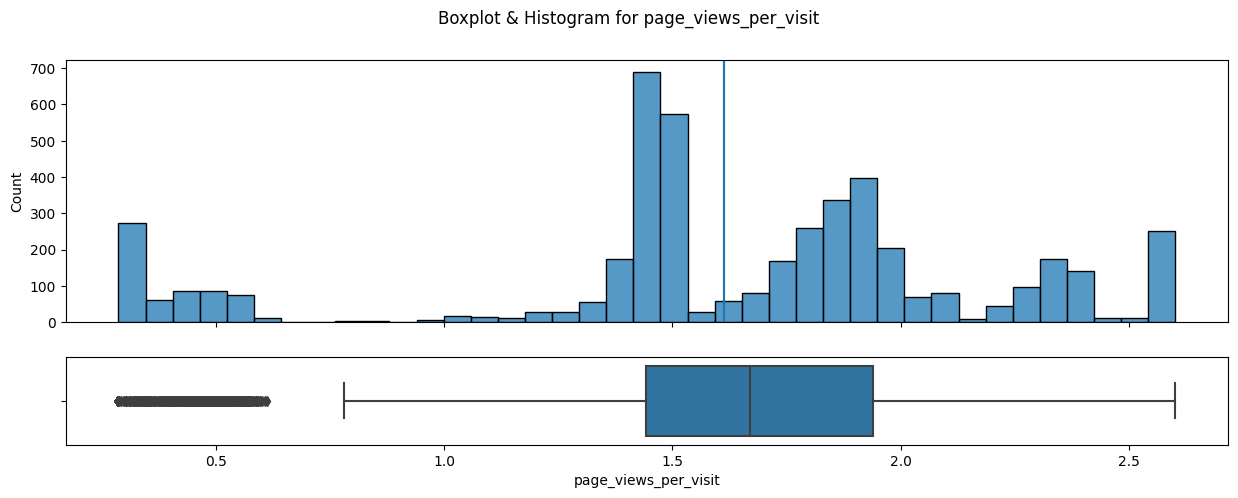

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of status

Stats for the column status:
 Mean: 0.29856895056374677
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 0.8806085180934274



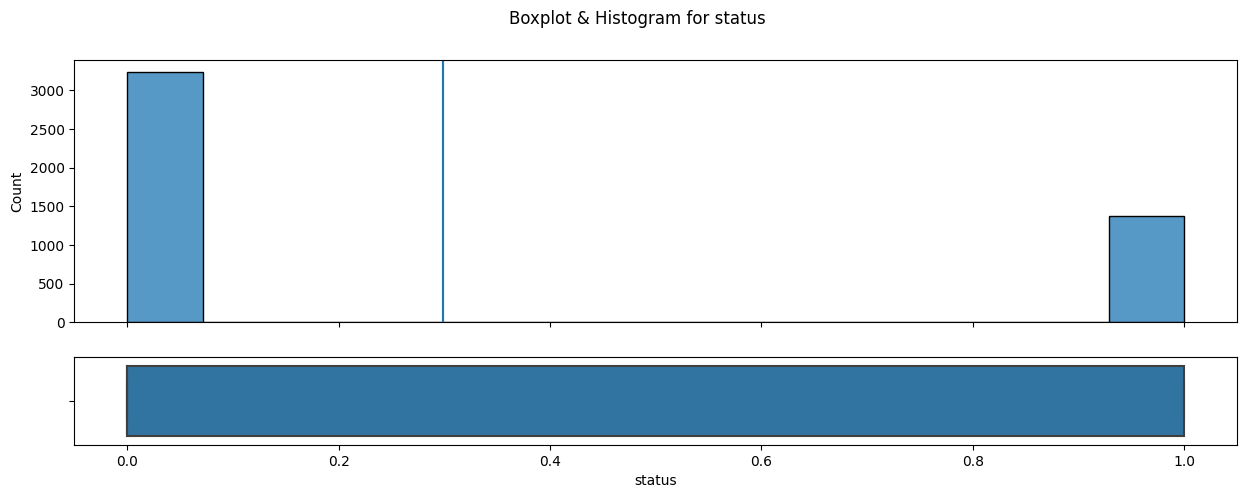

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of current_occupation_Student

Stats for the column current_occupation_Student:
 Mean: 0.12033824804856895
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 2.3345782298165783



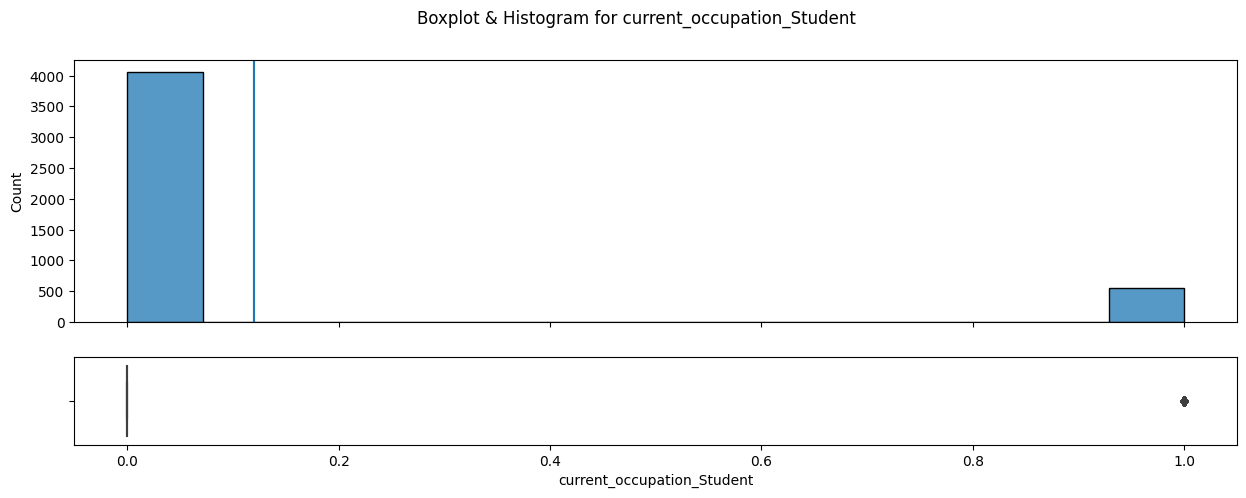

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of current_occupation_Unemployed

Stats for the column current_occupation_Unemployed:
 Mean: 0.3124457935819601
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 0.8095753508718075



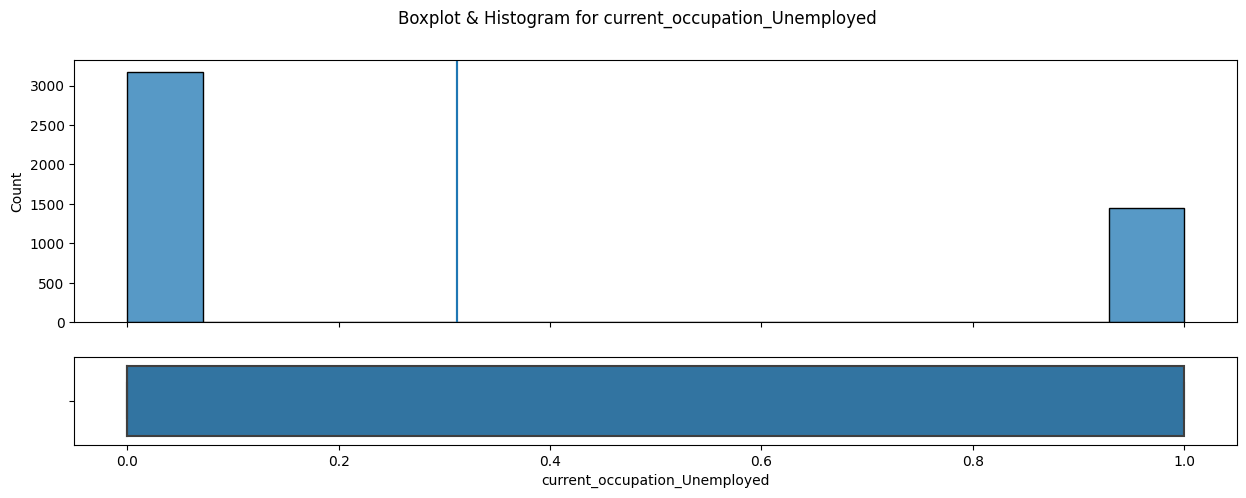

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of first_interaction_Website

Stats for the column first_interaction_Website:
 Mean: 0.5511708586296618
 Min: 0
 Max: 1
 Median: 1.0
 Skew: -0.20583078853613956



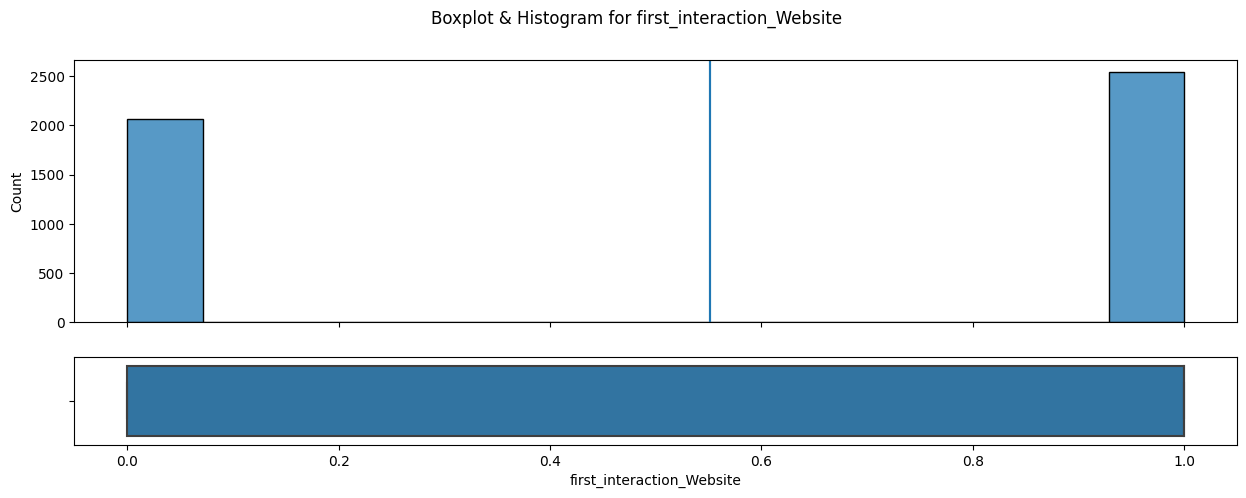

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of profile_completed_Low

Stats for the column profile_completed_Low:
 Mean: 0.023200346921075456
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 6.336613577265642



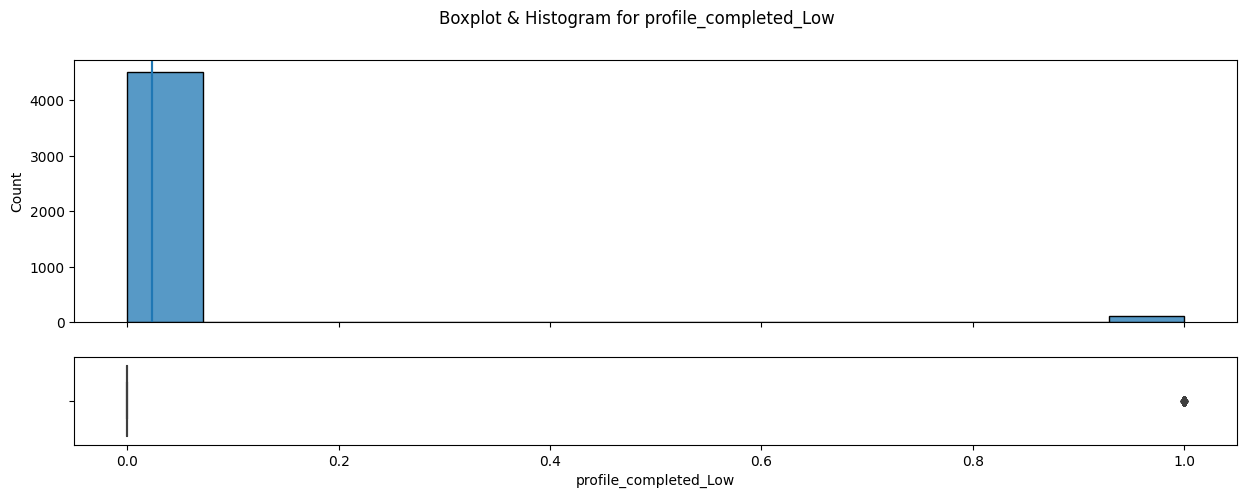

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of profile_completed_Medium

Stats for the column profile_completed_Medium:
 Mean: 0.48590633130962707
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 0.05641543381729396



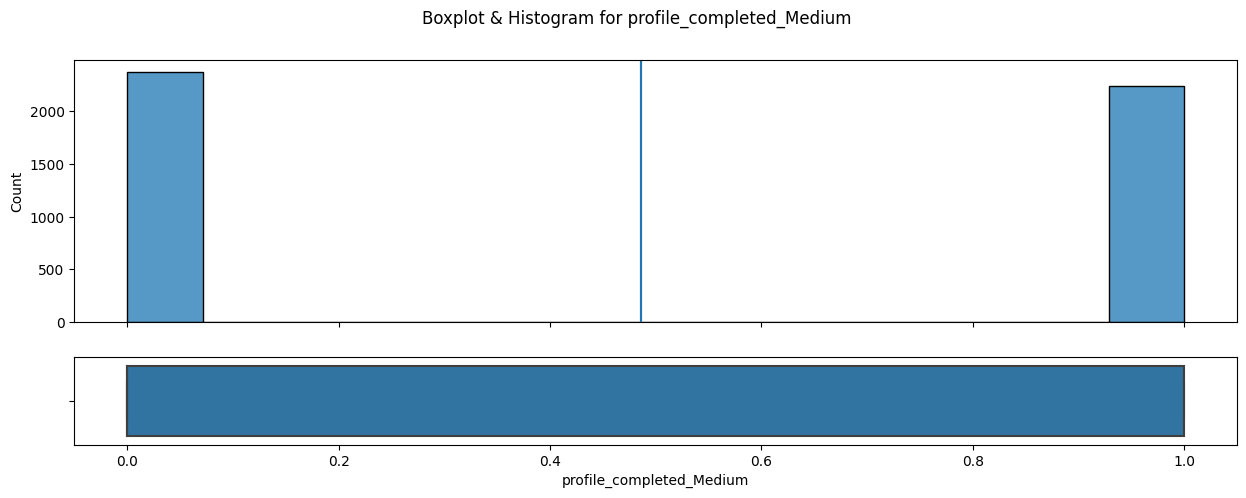

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of last_activity_Phone Activity

Stats for the column last_activity_Phone Activity:
 Mean: 0.2675628794449263
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 1.0504579291351344



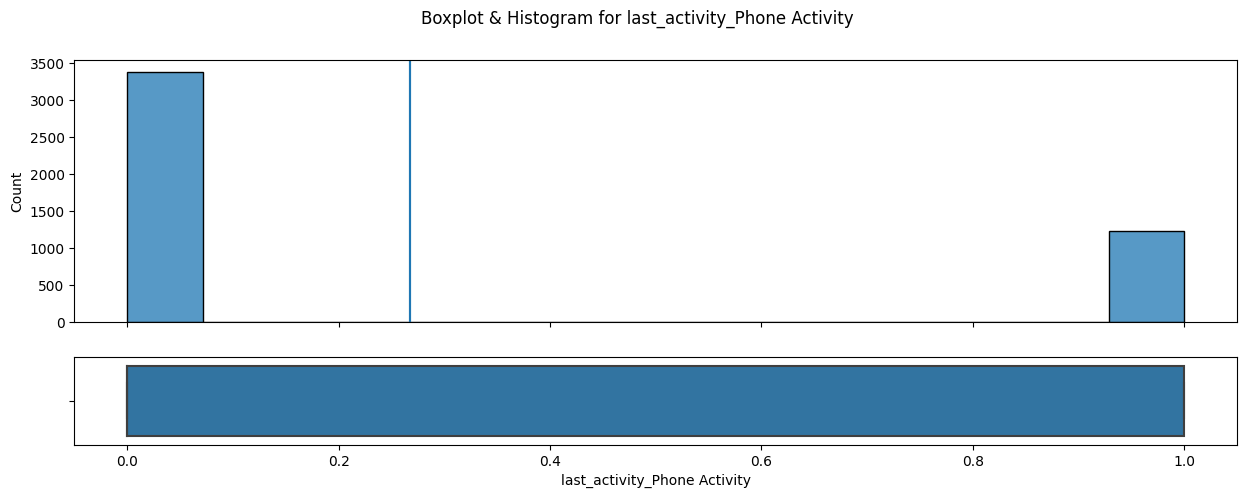

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of last_activity_Website Activity

Stats for the column last_activity_Website Activity:
 Mean: 0.23850823937554205
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 1.227566398740017



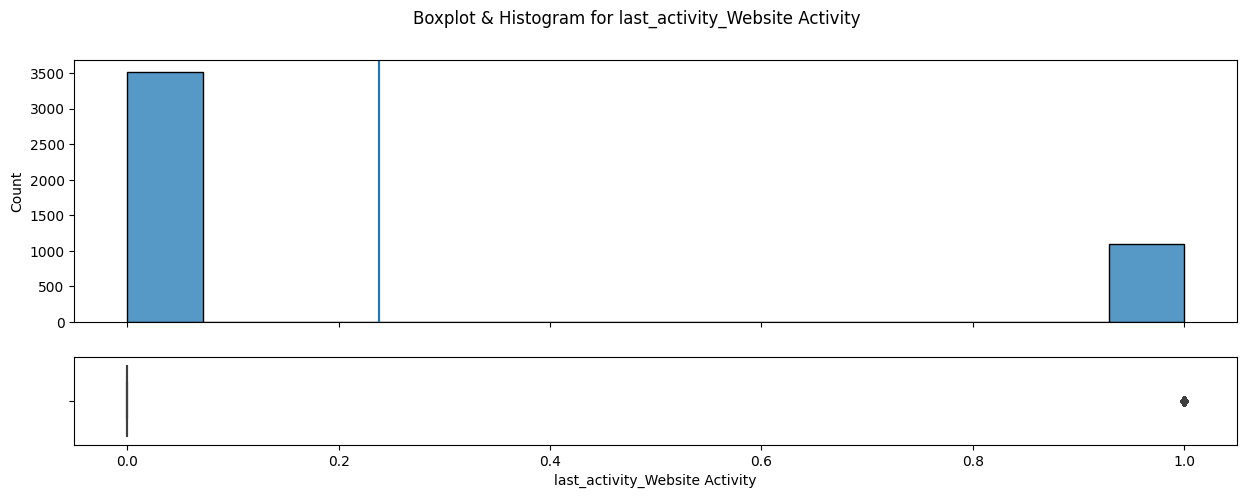

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of print_media_type1_1

Stats for the column print_media_type1_1:
 Mean: 0.10776235906331309
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 2.530735361328313



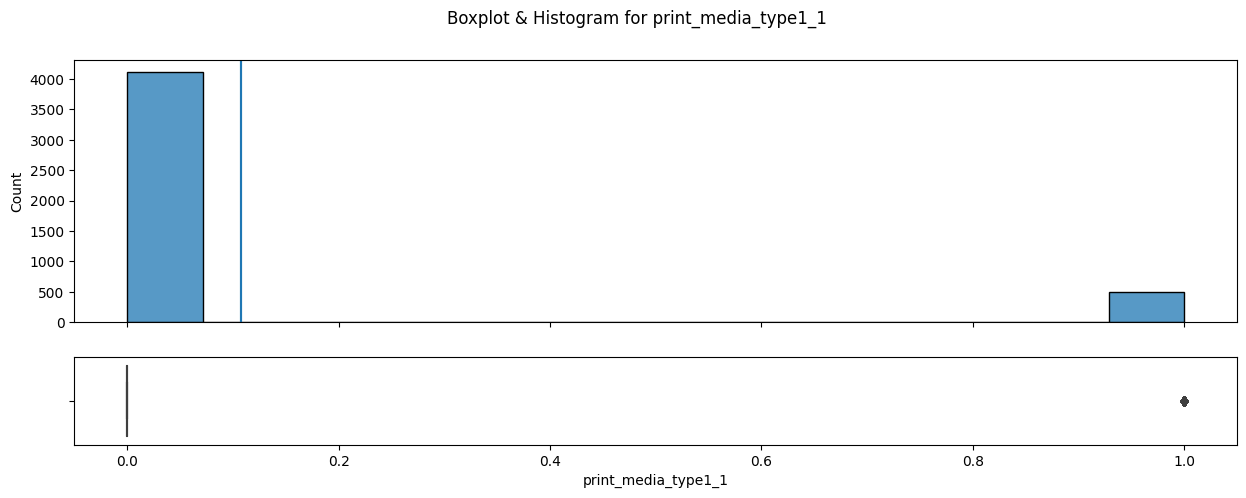

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of print_media_type2_1

Stats for the column print_media_type2_1:
 Mean: 0.050520381613183
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 4.105869575074143



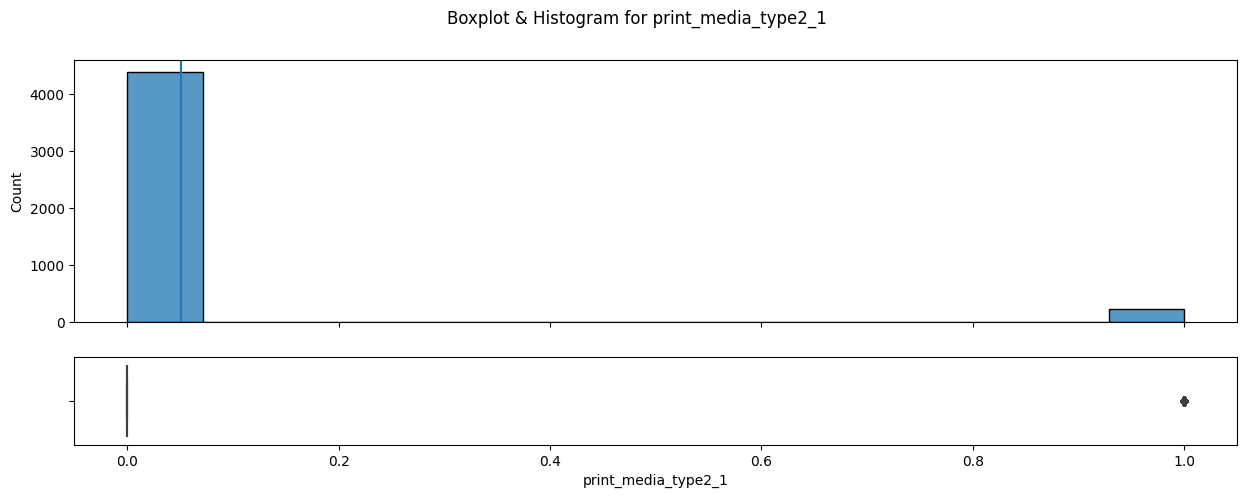

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of digital_media_1

Stats for the column digital_media_1:
 Mean: 0.1142671292281006
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 2.425749166007668



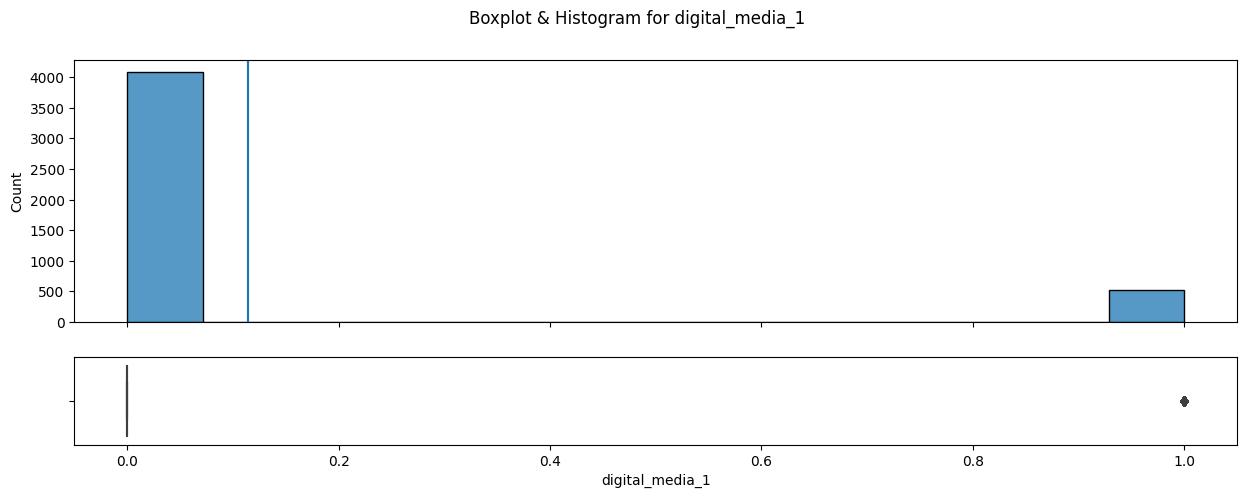

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of educational_channels_1

Stats for the column educational_channels_1:
 Mean: 0.1528620988725065
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 1.9299512922653592



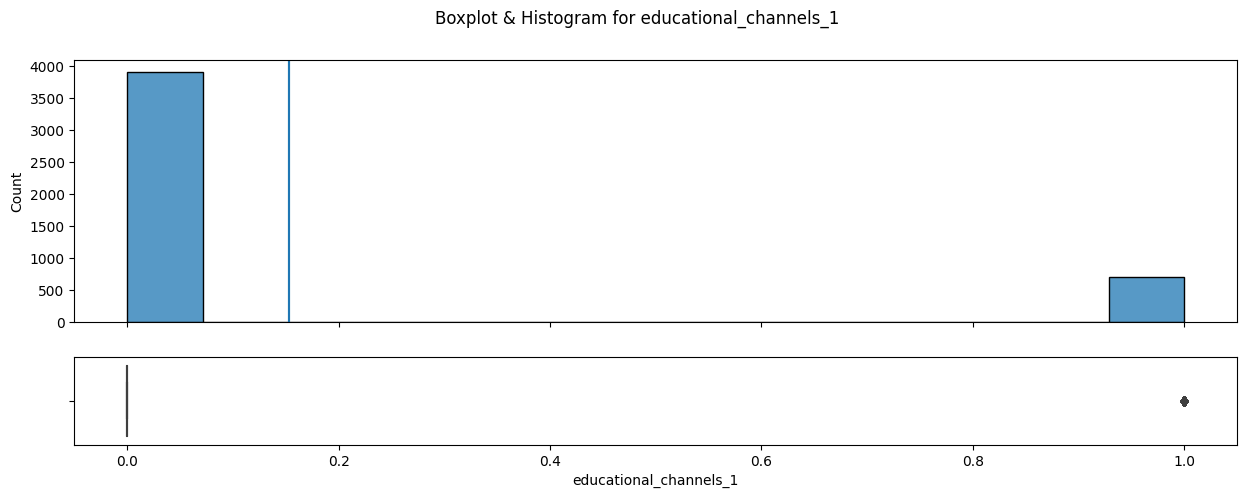

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of referral_1

Stats for the column referral_1:
 Mean: 0.020164787510841282
 Min: 0
 Max: 1
 Median: 0.0
 Skew: 6.829517932071302



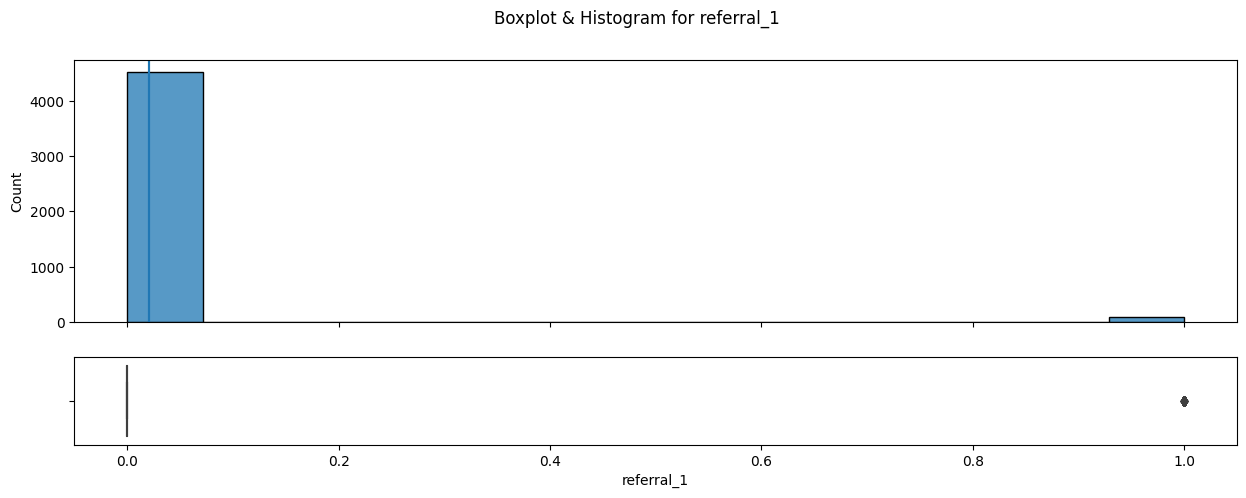

In [ ]:
for column in df.columns:
  uni_analyze(df,column)

##Key Notes before Modelling

**What is the importanct business KPI here?**
- We need to minimize false negatives or Type II error, that is customers who would actually convert but the model predicts as non-converting since this would lead to loss of potential customer and business loss.
- Reducing Type I error can help save company resources as those would be customers that were not going to convert but the model predicts as potential customers. For a startup, burn rates are usually less of a concern as compared to the conversion rates.

**What is the importanct model metric here?**
- Since we wish to have less False Negative and more True Positives, the important metric for us to score would be **Recall** in order to increase the ratio of True Positives to True Positives+False Negatives

**Define Function to Calculate Performance Metrics**

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    conf_mat = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(conf_mat, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Get Class Imbalance to initialize weights of the trees. The weights are (1 - class imbalance%) for a class

In [ ]:
class_df = df.groupby('status').agg({'ID':'count'}).reset_index()
column_sums = class_df.sum()
class_df = class_df.iloc[:, 1:].apply(lambda x: (x / column_sums[x.name]) * 100, axis=0)
class_df

,ID
0,70.143105
1,29.856895


## Building a Decision Tree model

In [ ]:
dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



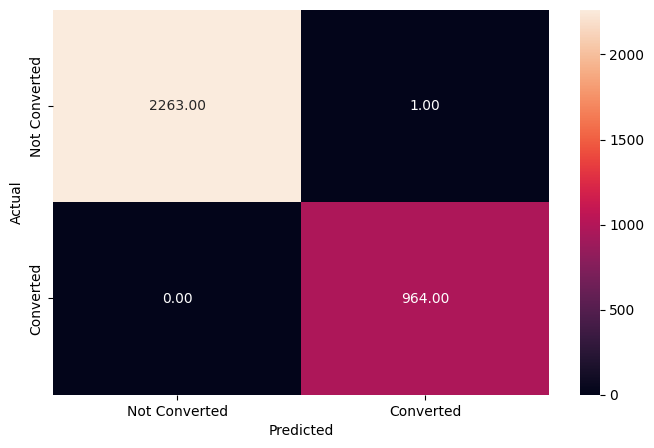

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- **100%** score for all metrics

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       971
           1       0.68      0.73      0.71       413

    accuracy                           0.82      1384
   macro avg       0.78      0.79      0.79      1384
weighted avg       0.82      0.82      0.82      1384



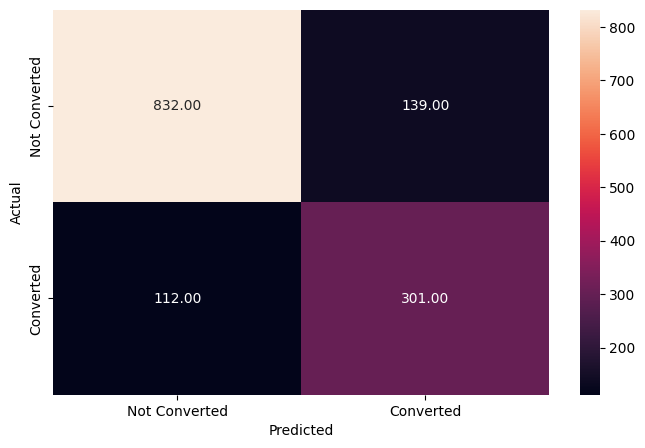

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

- The Decision Tree is overfitting as the recall of 100% in training dropped down to 73% in test for True class.
- Hyperparameter Tuning might make this model better

**Check Feature Importance of Decision Tree**

<Axes: >

<Figure size 1300x1300 with 0 Axes>

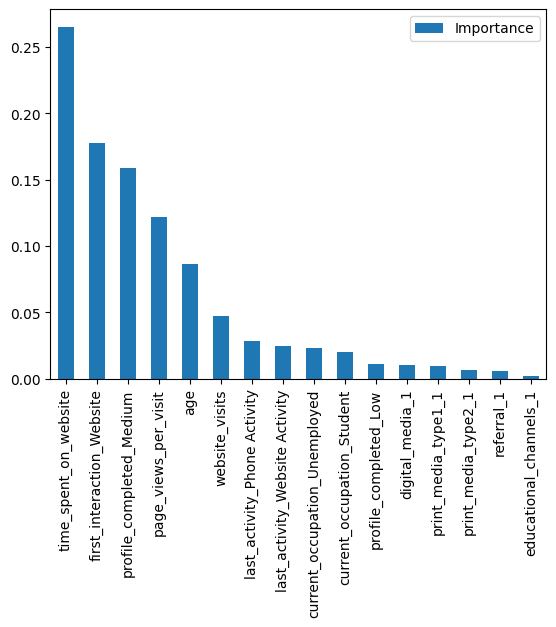

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

The top 3 features picked by the decision tree are
1. time_spent_on_website
2. first_interaction_website
3. profile_completed_medium

The least important features are:
1. educational_channels: True for Educational Channel Media
2. Referral_1 : True for Referral
3. print_media_type2_1 : True for Print Media Type 2


**Visualizing the Tree**

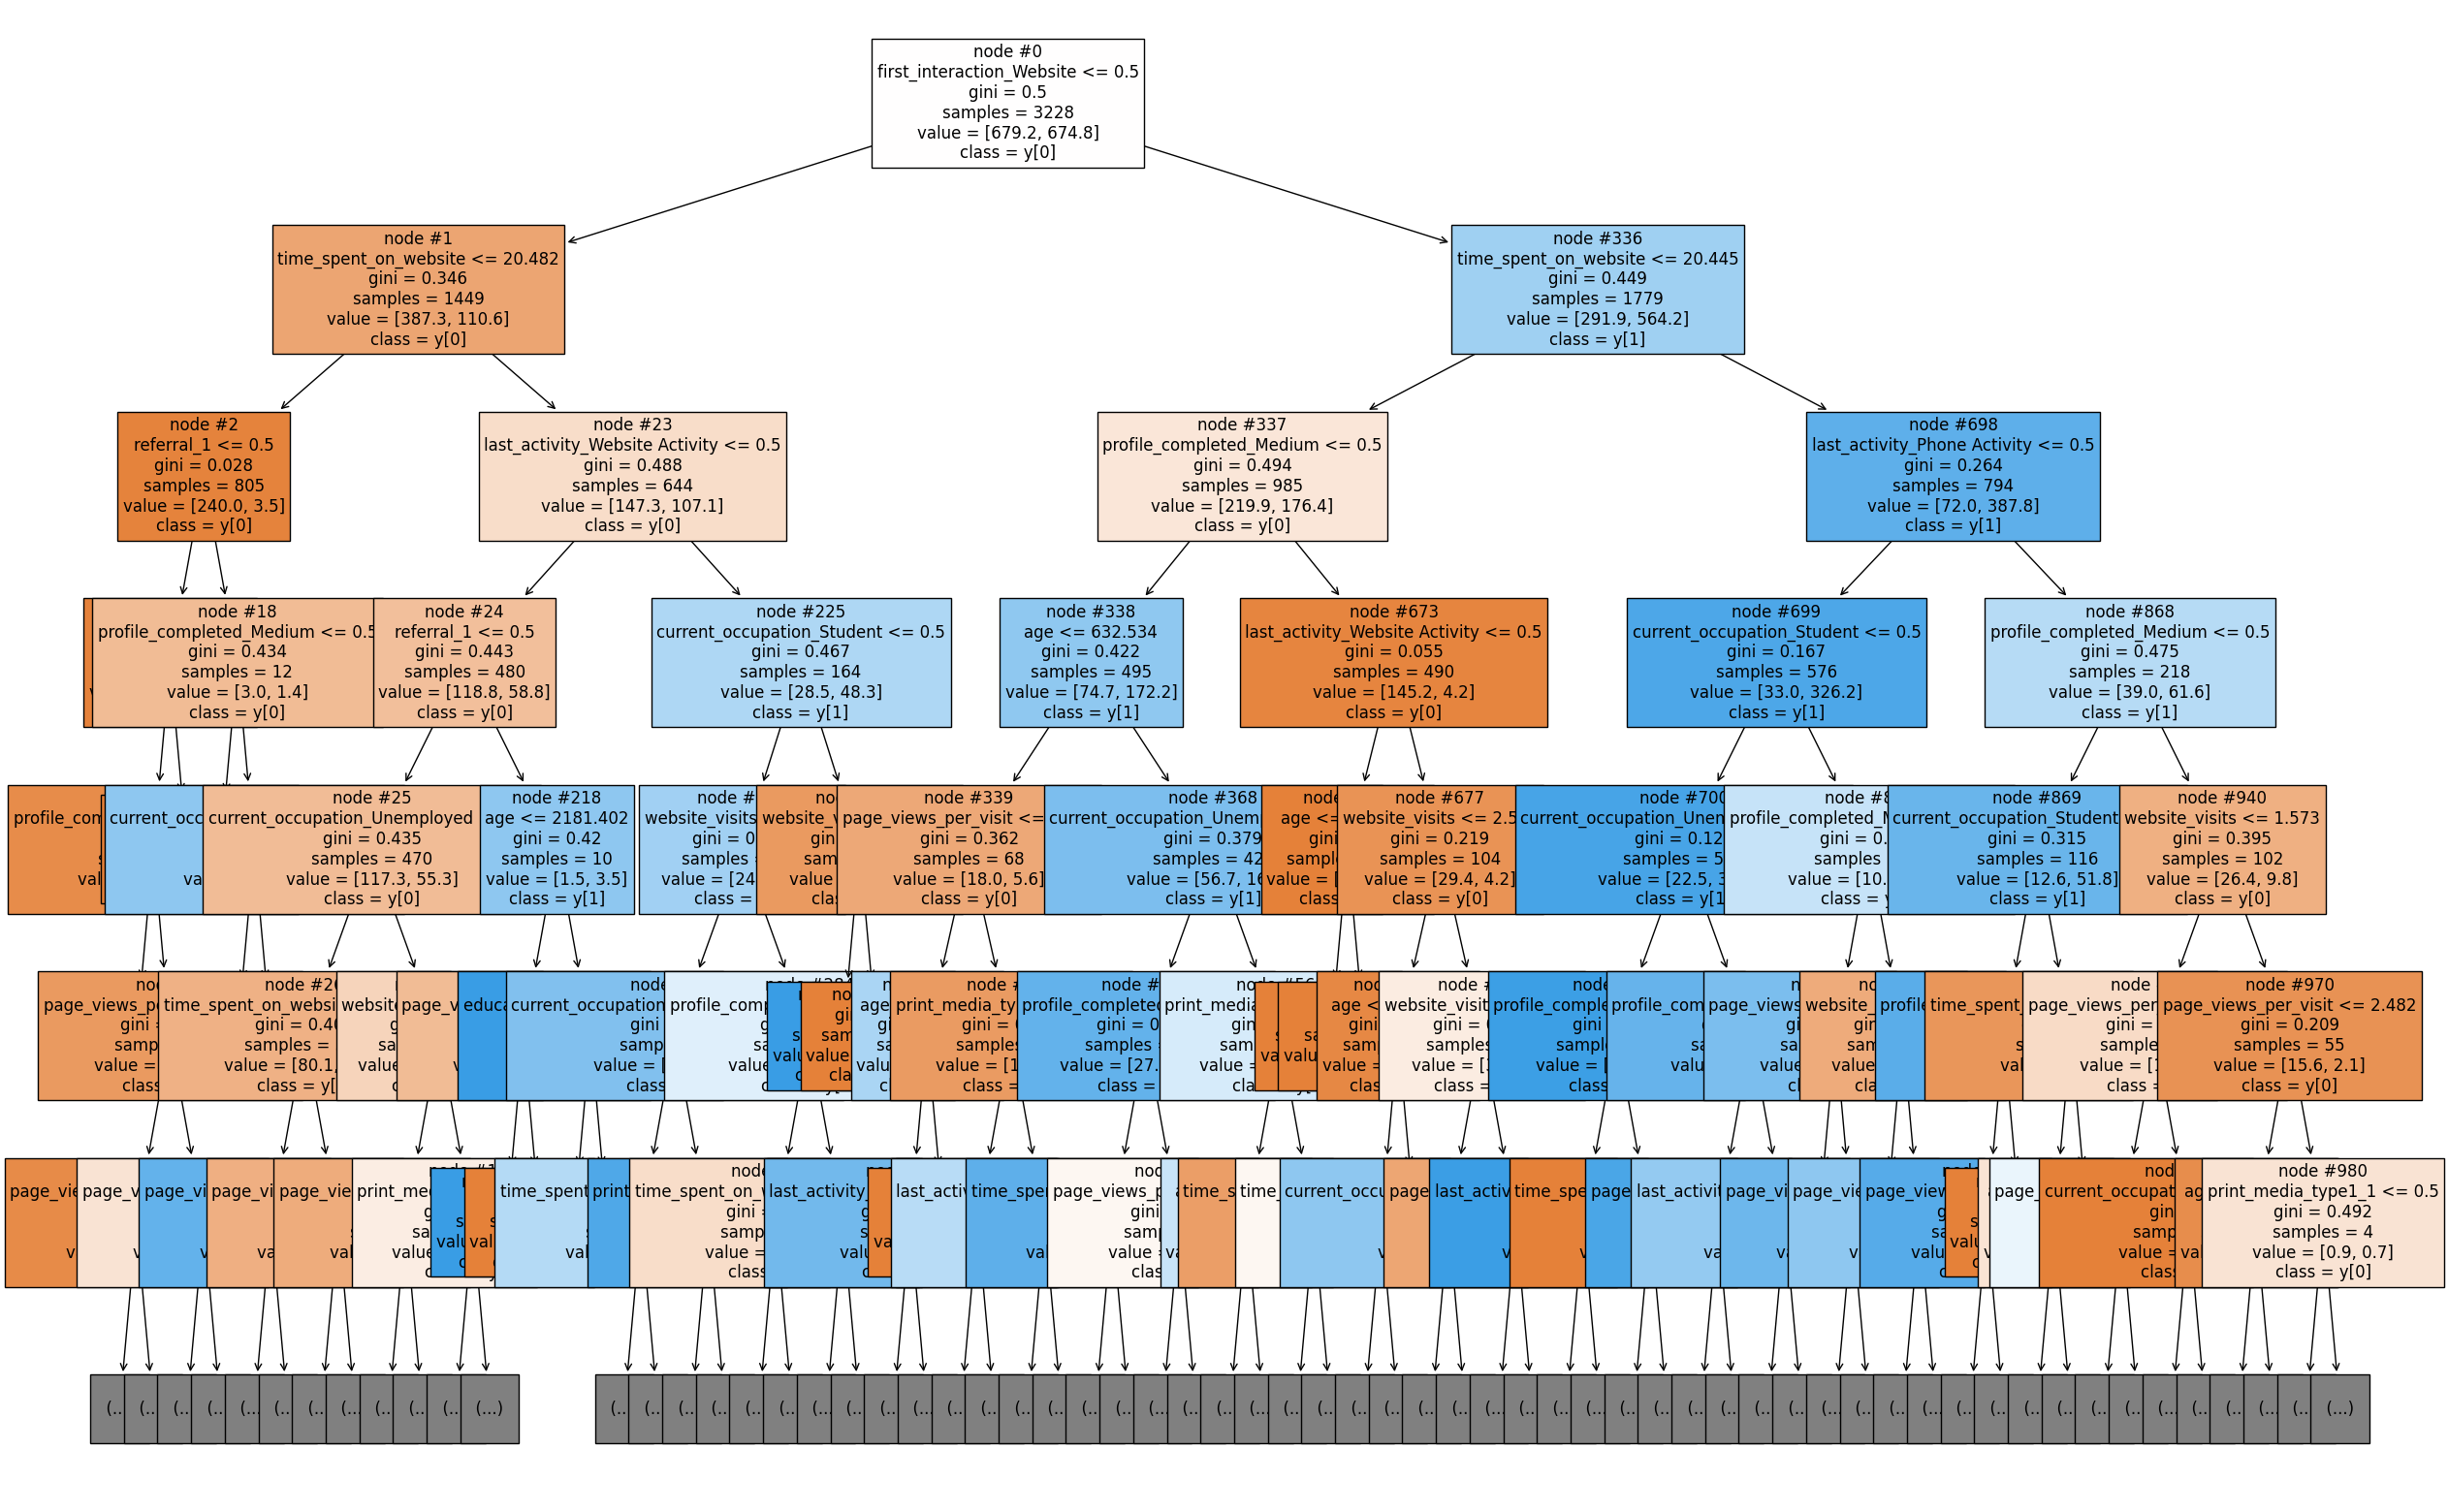

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth=6, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Hyperparameter Tuning for Decision Tree**

In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2264
           1       0.60      0.90      0.72       964

    accuracy                           0.79      3228
   macro avg       0.77      0.82      0.78      3228
weighted avg       0.84      0.79      0.80      3228



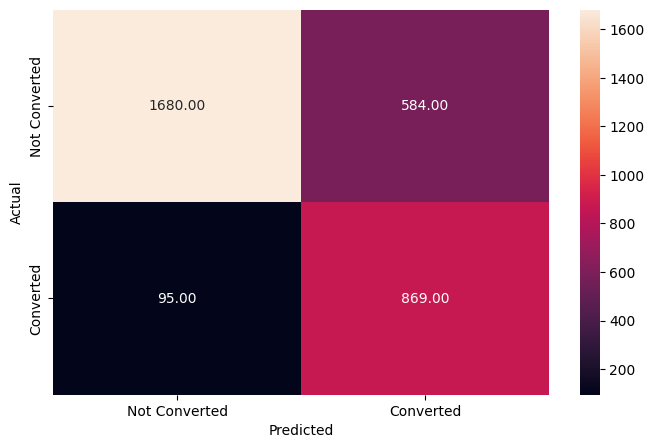

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       971
           1       0.60      0.90      0.72       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



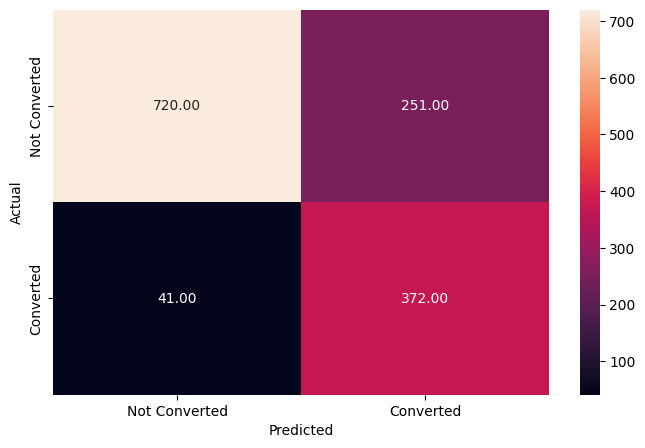

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

The recall is maintained at 90% in both train & test! Clearly tuning the hyperparameters has helped make the model more robust and ready-to-use. The recall is what is required the most to ensure that the False Negatives are low.

**Check Feature Importance of Tuned Decision Tree**

<Axes: >

<Figure size 1300x1300 with 0 Axes>

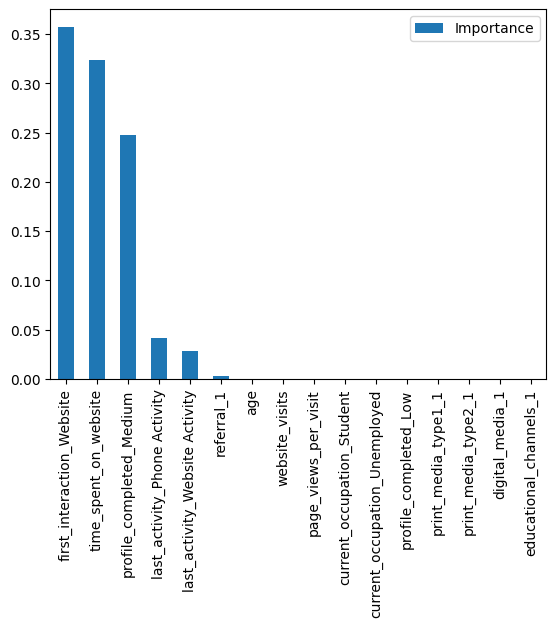

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

- Hyperparameter tuning seems to have oversimplified the decision trees learning as it's now assigned 3 features with approx 90% importance. This means that the model has a high bias.
- This means that despite the model giving a 90% test recall, the model can not be deployed as the bias is very high.
- Random Forest can help minimize this oversimplification

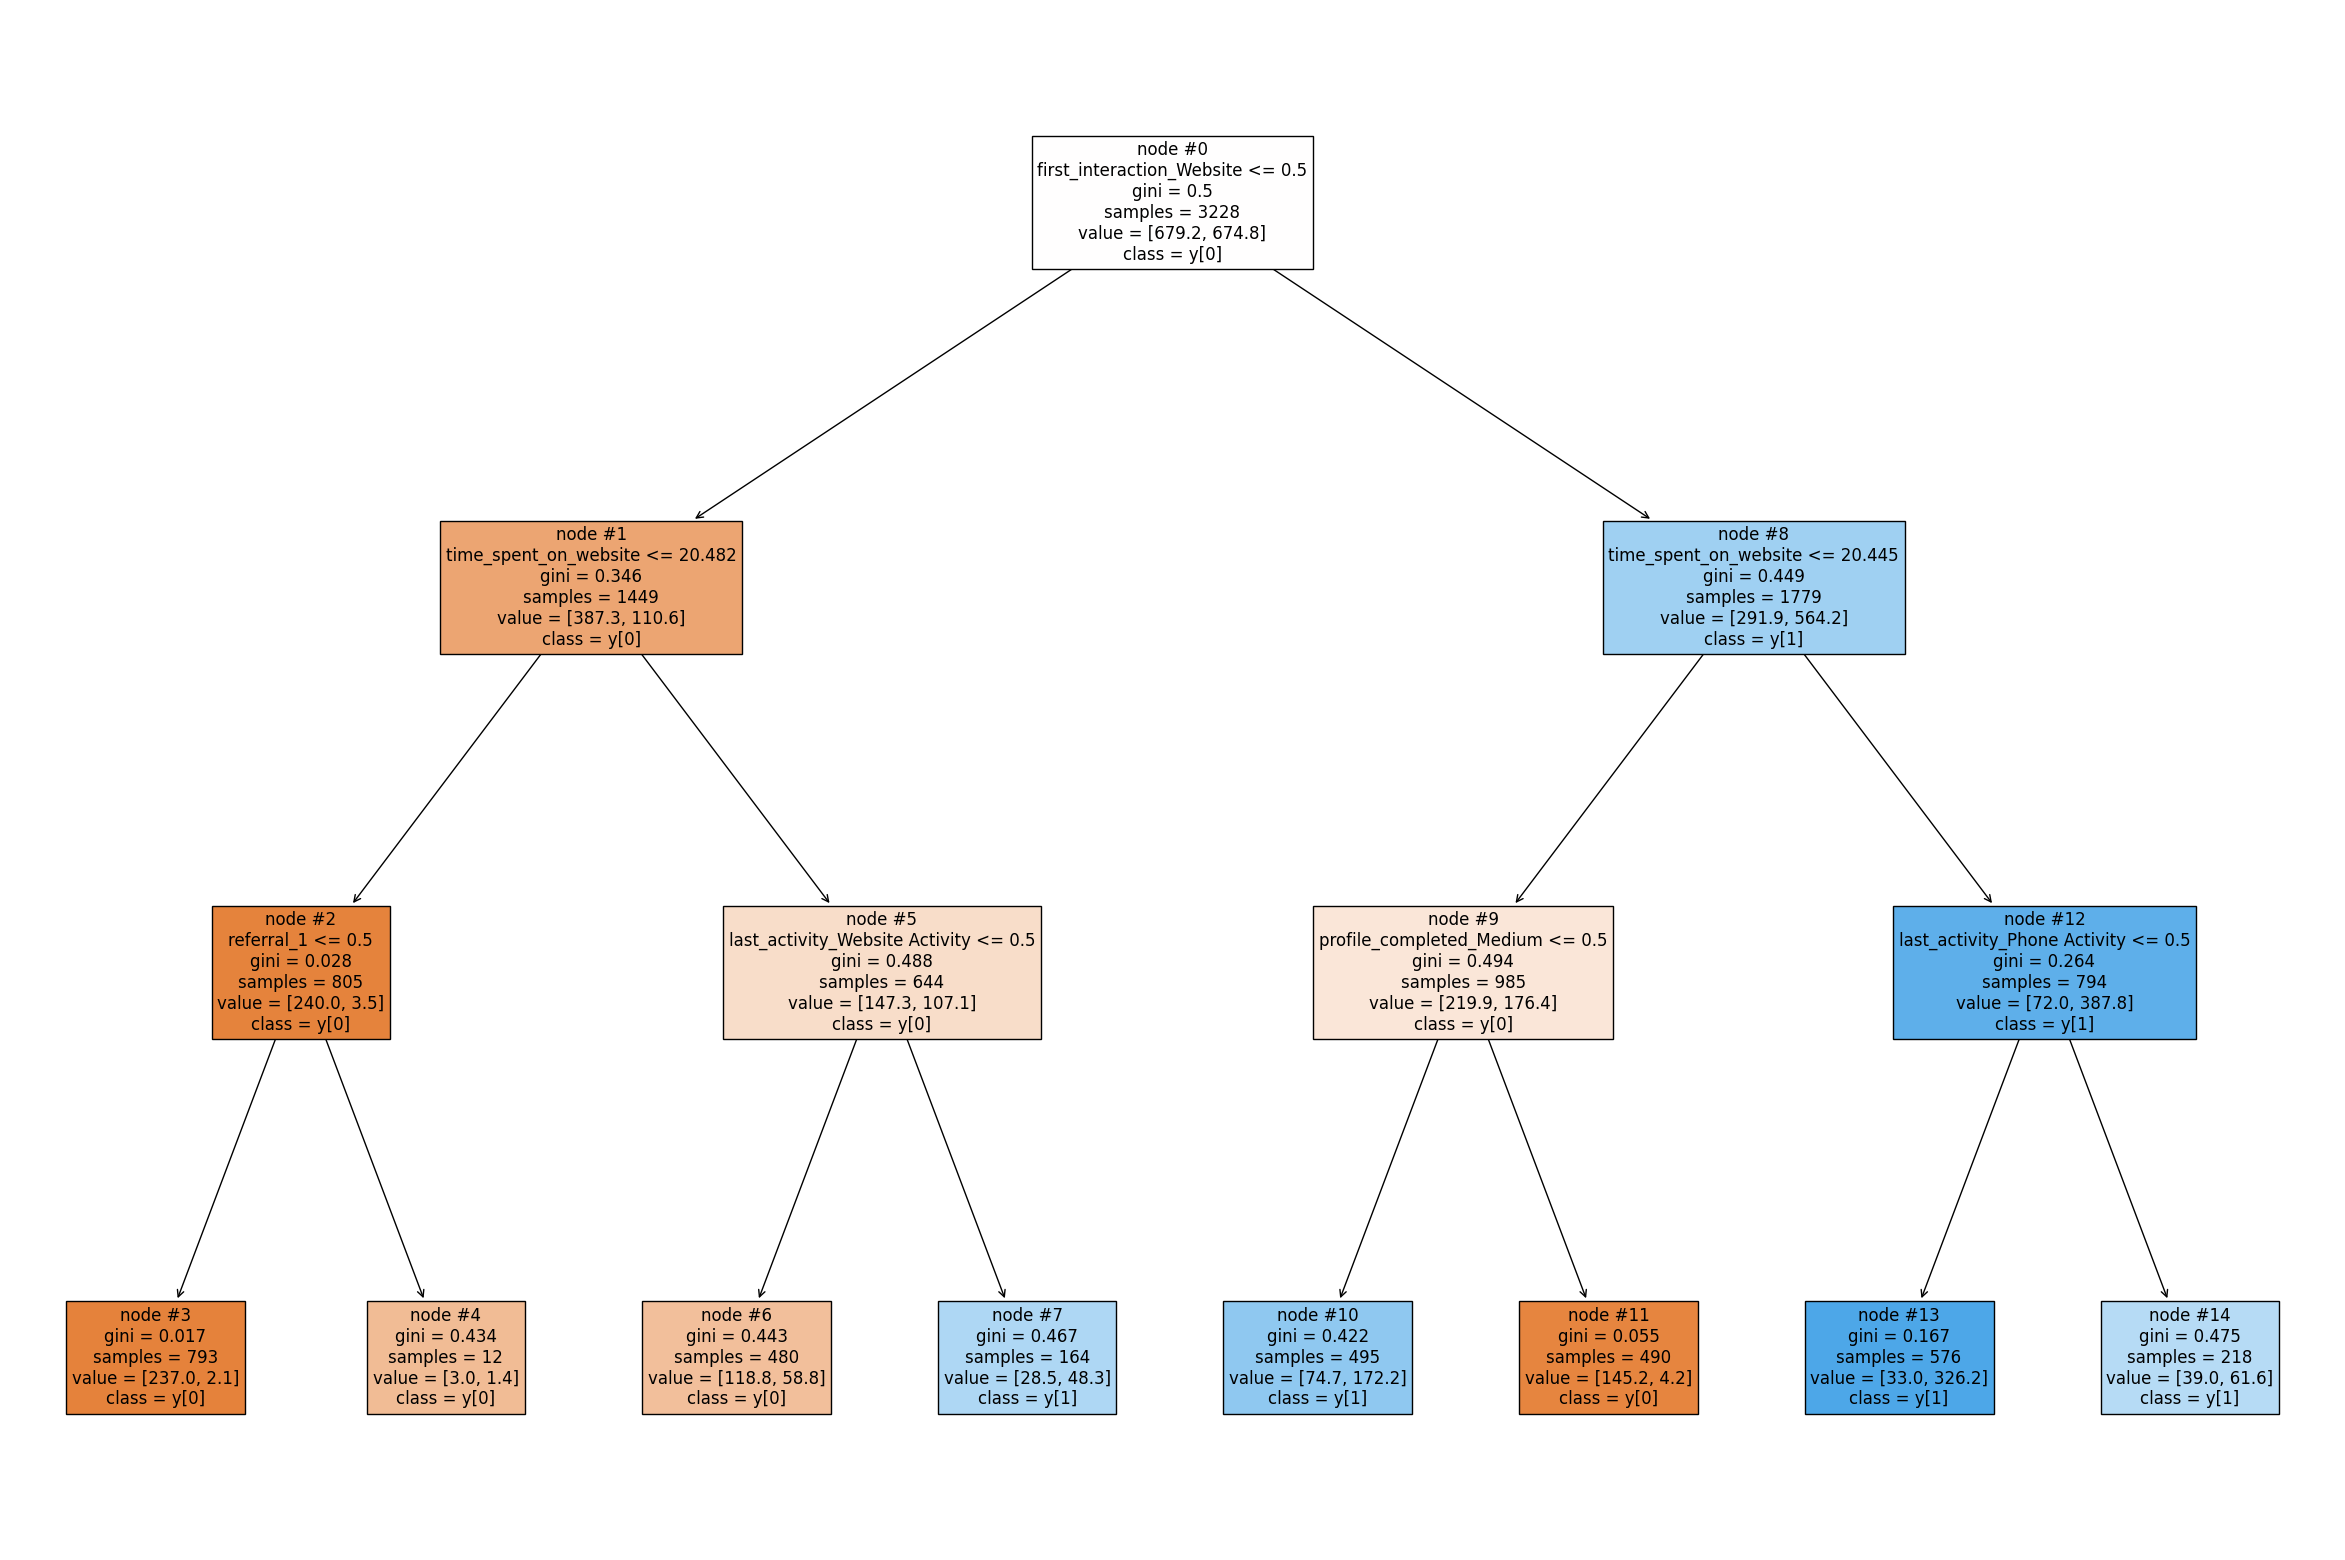

In [ ]:
plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator, max_depth=6, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Do we need to prune the tree?

DT without hyperparameter tuning seems to be overfitting the data. Pruning this tree might help reduce this problem.
We can prune the decision tree by fixing
- max_leaf_nodes
- min_samples_leaf
- max_depth

Note that the hyperparameter tuning has helped us prune the tree by limiting the max_depth and min_samples_leaf in the tree.


---
We can also reinitialise the tree with fixed hyperparameters to not let it over fit. Below is the code for the same.


In [ ]:
#Build a new tree using fixed hyperparameter

dtree_pruned = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree_pruned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2264
           1       0.75      0.73      0.74       964

    accuracy                           0.85      3228
   macro avg       0.82      0.81      0.82      3228
weighted avg       0.85      0.85      0.85      3228



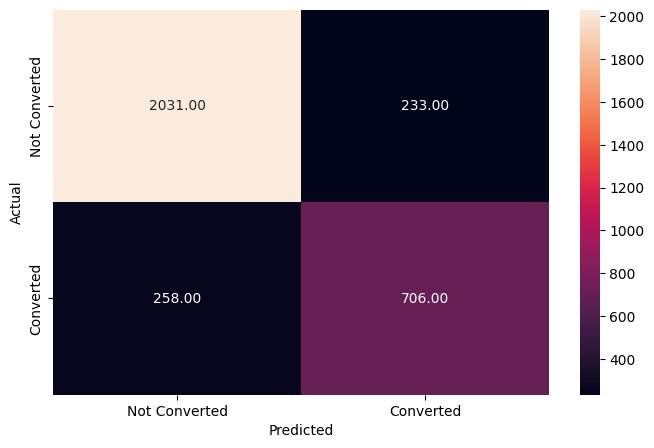

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_pruned.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       971
           1       0.74      0.74      0.74       413

    accuracy                           0.84      1384
   macro avg       0.81      0.81      0.81      1384
weighted avg       0.84      0.84      0.84      1384



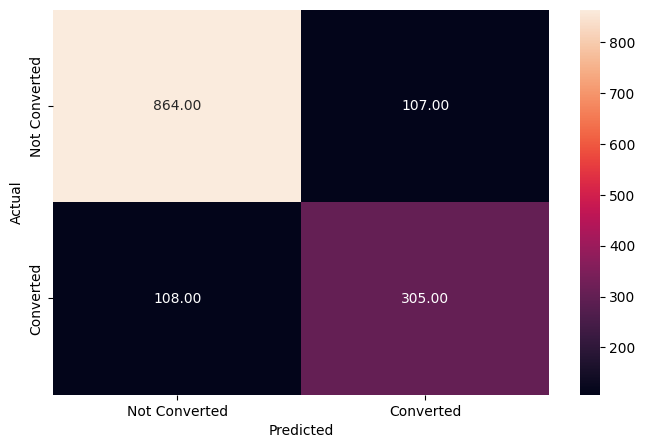

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_pruned.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

- Limiting the number of leafs and nodes has helped reduce overfitting as the recall is now similar for train and test set.
- However this isn't the best model output we have. The hyperparameter tuned result is the best recall we get.
- Upon pruning we would have limited the feature importance to only a few features that we can observe below.
- This is why it's best to let hyperparameter tuning take care of the parameters rather than manually tweaking them.

<Axes: >

<Figure size 1300x1300 with 0 Axes>

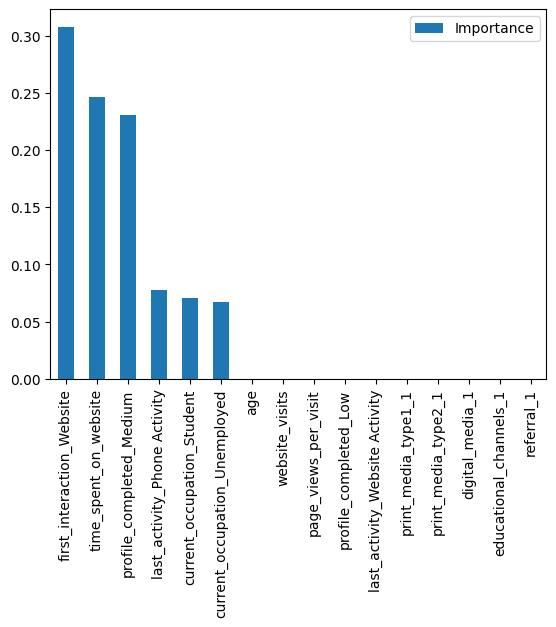

In [ ]:
## Plot Feature Importance
importances = dtree_pruned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



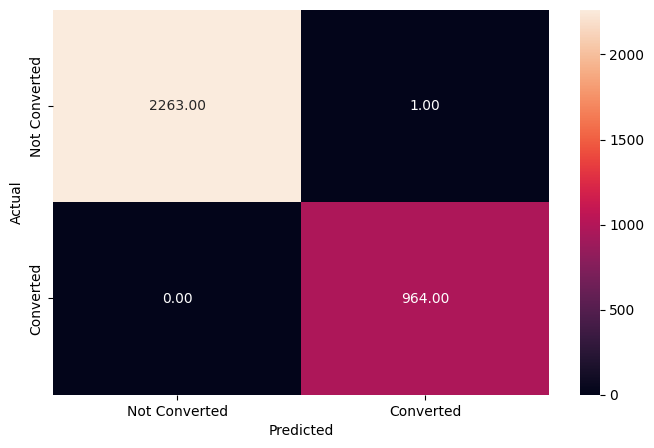

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       971
           1       0.79      0.69      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



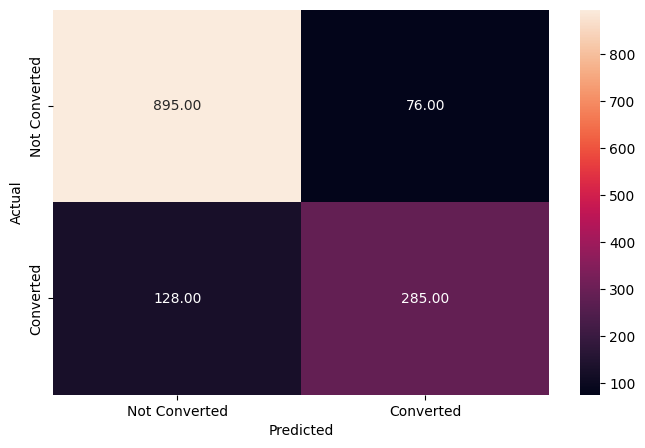

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**
- Clear case of overfitting. The recall on the training data is 1, while the recall on the test data is only ~ 0.69 for class 1.
- Hyperparameter Tuning should make this model better

**Feature Importance for Random Forest**

<Axes: >

<Figure size 1300x1300 with 0 Axes>

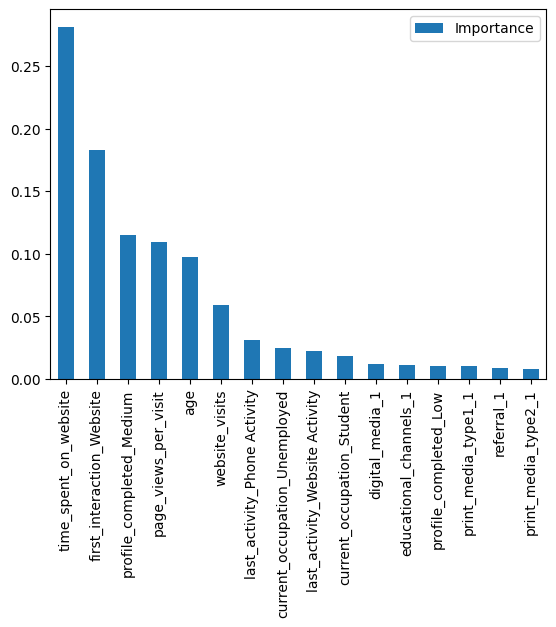

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

The top 3 features picked by Random Forest are
1. time_spent_on_website
2. first_interaction_website
3. profile_completed_medium

The least important features are:
1. print_media_type2_1 : True for Print Media Type 2
2. Referral_1 : True for Referral
3. print_media_type1_1 : True for Print Media Type 1

**Hyperparamter Tuning for Random Forest**

In [ ]:
# Initialise RF
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Define Parameter Grid
params_rf = {"n_estimators": [110,130,150,170],
    "max_depth": [4,5,6],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9, 'auto'],
    "max_samples": [0.8 ,0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Make Scorer for Recall for Class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features='auto', max_samples=0.8,
                       min_samples_leaf=25, n_estimators=110, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2264
           1       0.65      0.89      0.75       964

    accuracy                           0.82      3228
   macro avg       0.80      0.84      0.81      3228
weighted avg       0.86      0.82      0.83      3228



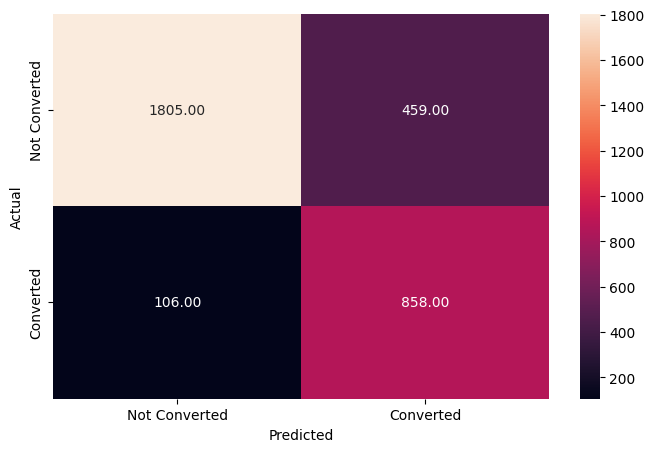

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       971
           1       0.66      0.89      0.76       413

    accuracy                           0.83      1384
   macro avg       0.80      0.85      0.81      1384
weighted avg       0.86      0.83      0.83      1384



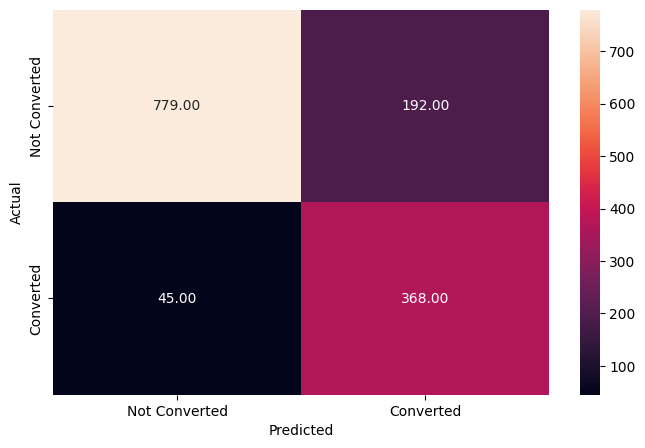

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

The recall increased from 69% to 89% on True class after hyperparameter tuning.
The train and test recall are comparable. This can be a reliable model for predictions going forward.

**Feature Importance for Tuned Random Forest**

<Axes: >

<Figure size 1300x1300 with 0 Axes>

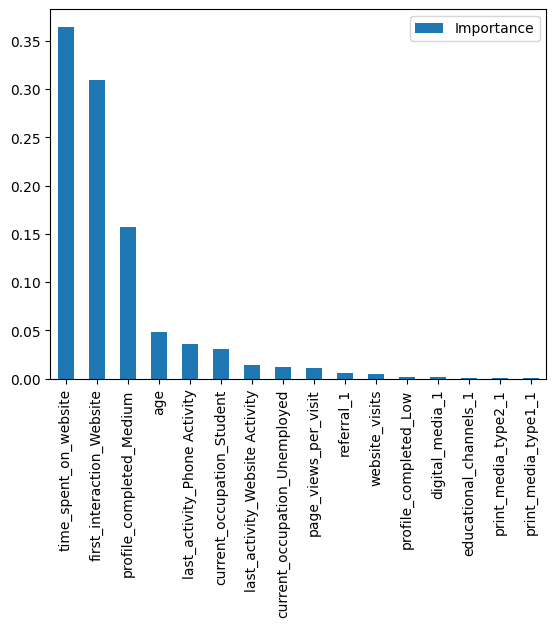

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

Hyperparameter Tuning for Random Forest doesn't oversimplify the model. We can still see that all the features have some level of importance associated.

## Do we need to prune the tree?

- Random Forests are able to avoid high levels of overfitting because of two reasons:
  1. Bootstrapping
  2. For large enough number of data points, the individual trees are almost independent

- However we see that our baseline Random Forest is overfitting as the train recall is much higher than the test recall. This means we need to prune the baseline tree.
- The hyperparameter tuning has helped reduce the overfitting as the tuned RF object has a max_depth set to 4 and the number of estimators also at the lower level of hyperparameter grid.
- Another way to prune the baseline tree would be through the use of the ccp_alpha parameter while initializing the object. The cost complexity pruning (ccp_alpha) parameter determines the effective amount of regularization applied during the pruning process. Below is the code for the same. Note that this hyperparameter can also be tuned during hyperparameter tuning.

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator_pruned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1, ccp_alpha=0.005)

rf_estimator_pruned.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.005, class_weight={0: 0.3, 1: 0.7},
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2264
           1       0.67      0.88      0.76       964

    accuracy                           0.83      3228
   macro avg       0.80      0.85      0.81      3228
weighted avg       0.86      0.83      0.84      3228



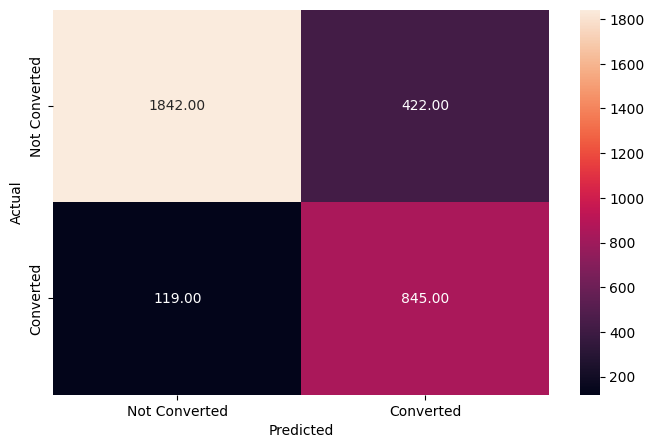

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator_pruned.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       971
           1       0.67      0.87      0.76       413

    accuracy                           0.84      1384
   macro avg       0.81      0.85      0.82      1384
weighted avg       0.86      0.84      0.84      1384



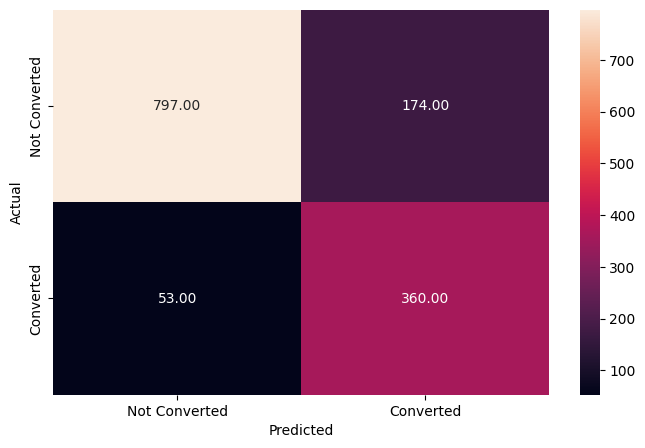

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator_pruned.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

<Axes: >

<Figure size 1300x1300 with 0 Axes>

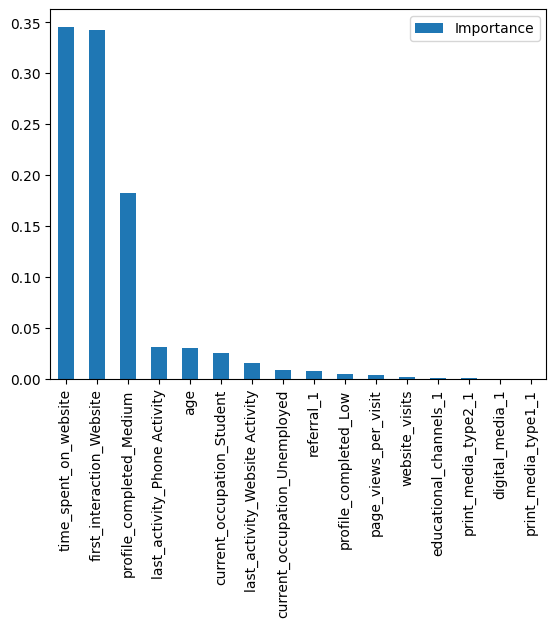

In [ ]:
# Plotting feature importance
importances = rf_estimator_pruned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

- Pruning helped reduce the overfitting as the train and test recalls are now comparable.
- Pruning has also reduced the number of features that the model is considering to be significant.
- It's important to note that hyperparamter tuning of the max_depth, max_features & min_samples_leaf can be a better way to prevent overfitting rather than guessing the pruning parameter.

## Actionable Insights and Recommendations

**Insights:**
- The top 5 features picked by Random Forest are below. These features are the most important to focus on in order to drive more conversions.
  1. time_spent_on_website
  2. first_interaction_website
  3. profile_completed_medium
  4. page_views_per_vist
  5. age
- The least important features are below. These features seem to have the least impact in driving conversions.
  1. print_media_type2_1 : True for Print Media Type 2: Magazine
  2. Referral_1 : True for Referral
  3. print_media_type1_1 : True for Print Media Type 1: Newspaper
  4. profile_completed_low: Low Profile Completion
  5. educational_channels_1: True for Educational Channels
- Last Activity as phone activity comes out to be an important feature which is counter-intuitive to what we observe in univariate analysis. This indicates that the last activity has to be looked at in conjuction with other features to understand it's true impact. Or that Last Activity phone helps user use the website to convert faster.
- Referral has a very small base of users but a very high conversion rate. This is an interesting observation. Increasing number of referrals might help increase conversions.
- Most users interact first with the website. The website can be made more user interactive to retain customers and increase conversion likelihood.
- Largest last_activity is Email. The company is targeting a lot of the potential customer base with Emails.
- While High Profile Completion had a high proportion of converted users, the model is picking Medium Profile Completion with more importance. This means that Profile Completion is reaching a high level when the user has already converted and then is filling out the remaining profile.
<br>
<br><br>
Additional Insights as answered in the questions post EDA
1. Professionals have a higher percentage of conversions on their base while students have the least. The current occupation plays an important role intuitively in determining likelihood of conversion. Median of these professionals is around 52. These could be people trying to upskill and stay relevant in their current profession.
2. People interacting with the website as the first touchpoint have higher chance of converting as shown in the barplot and the conversion% table. The first interaction medium definitely works well. There can be another study done into why mobile app as a medium is not working well.
3. The company interacts with the prospects through website, email and the mobile app. Website activity has the highest conversion rate followed closely by email activity which means that customers are converting most likely after last interacting with the website. We can also see in univariate analysis that the company primarily targets the customers through Email medium as it has the highest count.
4. Of the 5 channels (Newspaper, Magazine, Digital, Referral, Education), Referrals have the highest conversion rate, however it would be important to note that only a total of 93 users have interacted with this medium. In conventional Newspaper, Magazine and Digital, Magazine has a slightly better conversion rate but not enough to make it significantly better than other channels.
5. It's clearly visibile that while high profile completion and medium profile completion has similar number of total prospects, high profile completion has a much higher conversion rate (42% against 19%). Therefore, having more details about the prospects is clearly increasing the chances of conversion.

**Recommendations:**<br>
- Increasing time_spent_on_website has a large impact on conversion likelihood. Making the user flow more interactive and gamifying website content can increase the total time spect on the website which will help with the conversions.
- Since first interaction with websites have large imapct on conversion likelihood, clearly more customers should be redirected to the website at the point of acquisition. This also means that there should be an in-depth analysis of the phone app funnel to understand where the drop off is happening in the user journey.
- page_views_per_visit can be increased by gamifying the content making the user spend more time on the website which allows more content to be absorbed by the user. Nested categorical content on websites filtered through user cohorts can help increase the page_views_per_vist and also the time_spent_on_website.
- The media channels seem to have low feature importance, however this doesn't mean that the organization should reduce spending on media. Of the total base that is exposed to the media content, a decent ~30% converts. These channels are medium of acquisition so will have a decayed impact on actual conversions.
- Retargeting through website(push notifications, gamified content) is working well and so is Email targeting. The organization should conduct A/B testing of content to further improve their conversion rates through these mediums.
- Referrals have a very small base. Incentivizing referral programs can help increase the number of converted users. Referral programs are known to have high conversion rates.
- Last Activity Phone has come out to be a significantly important feature whereas we saw in the multivariate anaylsis that website as last activity has a higher conversion rate. Phone activity might be redirecting user to convert faster through the website, i.e through a phone conversation user can be redirected to fill their profile or interact with chat etc. Keeping both the channels open is key here to ensure that conversions do not drop.
- Students have a very low conversion likelihood. Discounts specific to students and course curation basis what is relevant in current student market can help increase conversion.
- Working Professionals show the most interest in the content. Testimonials being showcased on the landing pages for people who got promoted or made a switch to a better role can help as indirect levers of conversion.

**Profile of Lead with high conversion likelihood**
- Working Professional
- Mid-Senior/Senior Level (age 40-52)
- Starts User Journey from Website
- First Marketing Touchpoint: Digital Ads or Magazine Ads
- Retargeted through Email Communication